<h1><span style='font-family: "Trebuchet MS", Helvetica, sans-serif;'>Recommendation Systems - Module Project</span></h1>

<ul>
    <li>
        <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DOMAIN:</strong> Smartphone, Electronics</span>
    </li>
</ul>
<p><br></p>

<ul>
    <li>
        <article><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">CONTEXT:</span></strong></article>
    </li>
</ul>
<article>
    <font face="Trebuchet MS, Helvetica, sans-serif"> India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India 
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by 
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has 
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they 
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the 
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system 
based on individual consumer’s behaviour or choice.</font>
</article>

<ul>
    <li>
        <article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DATA DESCRIPTION:</strong> Phone Reviews</span></article>
    </li>
</ul>
<article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">• author : name of the person who gave the rating<br>
• country : country the person who gave the rating belongs to<br>
• date : date of the rating<br>
• domain: website from which the rating was taken from<br>
• extract: rating content<br>
• language: language in which the rating was given<br>
• product: name of the product/mobile phone for which the rating was given<br>
• score: average rating for the phone<br>
• score_max: highest rating given for the phone<br>
• source: source from where the rating was taken<br></span></article>

<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">PROJECT OBJECTIVE:</span></strong></li>
</ul>
<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">We will build a recommendation system using popularity based and collaborative filtering methods to recommend 
mobile phones to a user which are most popular and personalised respectively.</span></p>
<p><br></p>

In [1]:
# imports
import os
import numpy as np
import seaborn as sns
from pprint import pprint
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler


%matplotlib inline

<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">1. Import and explore the data.</span></h3>

In [2]:
# import data from "Data Set" Folder
file_paths = [f for f in os.listdir('./Data Set/')  if os.path.splitext(f)[1] == '.csv']
print(file_paths)
# MERGE Data Frames
FULL_DF = pd.DataFrame()
for fp in file_paths:
    # engine{‘c’, ‘python’}, optionalParser engine to use. (to handle encoding in text)
    # The C engine is faster while the python engine is currently more feature-complete. 
    df = pd.read_csv(f'./Data Set/{fp}', engine='python')
    FULL_DF = pd.concat([df, FULL_DF])


['phone_user_review_file_1.csv', 'phone_user_review_file_2.csv', 'phone_user_review_file_3.csv', 'phone_user_review_file_4.csv', 'phone_user_review_file_5.csv', 'phone_user_review_file_6.csv']


In [3]:
full_df = FULL_DF.copy(deep=True)

In [4]:
full_df.shape

(1415133, 11)

In [5]:
full_df.sample(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
72400,/cellphones/oneplus-3/,7/18/2016,en,in,Amazon,amazon.in,10.0,10.0,The phone puts everyone behind in the benchmar...,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)"
223170,/cellphones/motorola-moto-g3/,9/22/2015,en,in,Amazon,amazon.in,8.0,10.0,Excellent...little bit lagging problems after ...,apurva parashar,"Motorola Moto G 3rd Generation (Black, 16GB)"
295633,/cellphones/sony-ericsson-w980/,8/7/2008,ru,ua,Hotline.ua,hotline.ua,8.0,10.0,ÐžÑ‚Ð»Ð¸Ñ‡Ð½Ñ‹Ð¹ Ñ„ÑƒÐ½ÐºÑ†Ð¸Ð¾Ð½Ð°Ð»ÑŒÐ½Ñ‹Ð¹ ...,NaN,Sony Ericsson W980i
105157,/cellphones/samsung-galaxy-s6/,8/26/2016,nl,nl,Belsimpel,belsimpel.nl,10.0,10.0,"Super telefoon, kwaliteit prijs is veel belove...",JW Stiekema,Samsung Galaxy S6 32GB G920F Gold
75589,/cellphones/samsung-galaxy-s-iii-neo-i9300i/,10/20/2014,es,es,Amazon,amazon.es,10.0,10.0,hola despues de dos aÃ±os va como un tiro este...,luis,Samsung Galaxy S3 Neo - Smartphone libre Andro...


In [6]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 374909
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In [7]:
full_df.isna().sum()  # check for missing values

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [8]:
full_df.score_max.value_counts(dropna=False, normalize=True)

10.0    0.955136
NaN     0.044864
Name: score_max, dtype: float64

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">There are 4% of missing values in the score (target variable) and score_max columns; Hence, we drop these rows from the data frame as we can't use these data points for building our recommendation systems. Also, we drop score_max column as it has only a single value 10 for all non-missing data points. Hence, it adds no information</span></h4>
</blockquote>

In [9]:
full_df.dropna(subset=['score'], inplace=True) # drop rows if score is missing

In [10]:
full_df.drop(['score_max'], axis=1, inplace=True) # drop score_max

In [11]:
full_df['score'] = full_df.score.apply(lambda x: round(x))  # round off scores to nearest integer
full_df['score'].value_counts(normalize=True)

10    0.492547
8     0.226058
2     0.095263
6     0.087559
4     0.054255
9     0.030039
7     0.006489
5     0.003499
1     0.002400
3     0.001859
0     0.000031
Name: score, dtype: float64

In [12]:
# drop rows with zero rating
full_df = full_df[full_df.score > 0]

In [13]:
full_df[full_df['author'].isnull()] # cannot be imputed

,phone_url,date,lang,country,source,domain,score,extract,author,product
261,/cellphones/asus-p750/,12/5/2008,en,gb,eXpansys,expansys.com,10,I have it for about 2 weeks now. Very nice pro...,NaN,"ASUS P750 (UK, English, GPS)"
262,/cellphones/asus-p750/,7/14/2008,en,gb,eXpansys,expansys.com,10,Very happy with this as a replacement for my b...,NaN,"ASUS P750 (UK, English, GPS)"
263,/cellphones/asus-p750/,5/5/2008,en,gb,eXpansys,expansys.com,10,"Quick , reliable, excellent design for one han...",NaN,"ASUS P750 (UK, English, GPS)"
265,/cellphones/asus-p750/,4/21/2008,en,gb,eXpansys,expansys.com,10,I've had this phone for 2Â½ weeks and so far i...,NaN,"ASUS P750 (UK, English, GPS)"
266,/cellphones/asus-p750/,2/5/2008,en,gb,eXpansys,expansys.com,2,"When it worked, it was a dream. But it crashed...",NaN,"ASUS P750 (UK, English, GPS)"
...,...,...,...,...,...,...,...,...,...,...
374904,/cellphones/huawei-y3/,12/14/2015,ru,ru,Yandex,market.yandex.ru,6,ÐŸÑ€Ð¸Ð½Ñ†Ð¸Ð¿Ð¸Ð°Ð»ÑŒÐ½Ð° Ð±Ñ‹Ð»Ð° Ñ„Ñ€Ð¾Ð½Ñ‚...,NaN,Huawei Y3 U03
374905,/cellphones/huawei-y3/,11/30/2015,ru,ru,Yandex,market.yandex.ru,8,Ð² Ñ�Ð°Ð»Ð¾Ð½Ðµ ÐœÐ¢Ð¡ ÐºÑƒÐ¿Ð¸Ð» Ð¿Ð¾ Ð°ÐºÑ†Ð...,NaN,Huawei Y3 U03
374906,/cellphones/huawei-y3/,11/9/2015,ru,ru,Yandex,market.yandex.ru,8,Ð’ Ñ†ÐµÐ»Ð¾Ð¼ Ð½ÐµÐ¿Ð»Ð¾Ñ…Ð¾Ð¹ Ð´ÐµÐ²Ð°Ð¹Ñ� Ð±...,NaN,Huawei Y3 U03
374907,/cellphones/huawei-y3/,9/27/2015,ru,ru,Yandex,market.yandex.ru,10,Ð’ Ð¾Ð±Ñ‰ÐµÐ¼ Ð¸ Ñ†ÐµÐ»Ð¾Ð¼ Ð°Ð¿Ð¿Ð°Ñ€Ð°Ñ‚ Ð½Ð...,NaN,Huawei Y3 U03


In [14]:
(full_df.author.isna().sum() / full_df.shape[0])*100 # 4.4% missing values in author, drop when using author info

4.484012305397595

In [15]:
full_df[full_df['extract'].isnull()] # cannot be imputed, can be dropped when we need content based review data

,phone_url,date,lang,country,source,domain,score,extract,author,product
267,/cellphones/asus-p750/,2/10/2013,ru,ru,Irecommend,irecommend.ru,6,NaN,Akris,ASUS P750
276,/cellphones/asus-p750/,6/30/2011,ru,ru,Yandex,market.yandex.ru,8,NaN,NaN,ASUS P750
285,/cellphones/asus-p750/,5/14/2010,ru,ru,Irecommend,irecommend.ru,10,NaN,Ð�Ð¸Ð³Ð¸Ð½Ð°,ASUS P750
419,/cellphones/nokia-1209/,6/18/2009,ru,ua,Mob.org,mob.ua,8,NaN,Fedor7777,Nokia 1209
588,/cellphones/samsung-sgh-f250/,11/17/2009,ru,ua,Mob.org,mob.ua,8,NaN,Den danila,Samsung F250
...,...,...,...,...,...,...,...,...,...,...
371630,/cellphones/lg-g4-stylus-h635/,8/14/2016,ru,ru,Yandex,market.yandex.ru,6,NaN,ÐžÐ³Ð½ÐµÐ² Ð”ÐµÐ½Ð¸Ñ�,LG G4 Stylus H540F
371948,/cellphones/microsoft-lumia-535/,1/11/2016,en,us,Newegg,newegg.com,10,NaN,Thomas A.,Microsoft Lumia 535 8GB 3G Black Unlocked Cell...
372952,/cellphones/microsoft-lumia-535/,1/19/2016,ru,ru,Irecommend,irecommend.ru,8,NaN,Bubo4ka_smile,Microsoft ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Mi...
373262,/cellphones/microsoft-lumia-535/,8/16/2015,ru,ru,Yandex,market.yandex.ru,8,NaN,NaN,Microsoft Lumia 535


In [16]:
(full_df.extract.isna().sum() / full_df.shape[0])*100 # 1.4% missing values in author, drop when using author info

1.401670018245016

In [17]:
full_df.dropna(subset=['extract', 'author'], inplace=True) # drop rows if score is missing

In [18]:
full_df[full_df['product'].isnull()] # product name missing

,phone_url,date,lang,country,source,domain,score,extract,author,product


In [19]:
full_df[full_df['phone_url'] == '/cellphones/samsung-galaxy-s-iii/']['product'].value_counts()

Samsung Galaxy S III 16GB (Virgin Mobile)                                                                                                           730
Samsung Galaxy S III                                                                                                                                687
Samsung Galaxy Express I8730                                                                                                                        603
Samsung Galaxy S III 16GB (Straight Talk)                                                                                                           556
Samsung Galaxy S III i9300 Smartphone 16 GB (12,2 cm (4,8 Zoll) HD Super-AMOLED-Touchscreen, 8 Megapixel Kamera, Micro-SIM, Android 4.0) schwarz    381
                                                                                                                                                   ... 
Burberry Brit Rhythm Men - Eau de Toilette                                              

In [20]:
full_df['product'].value_counts(dropna=False) # 56036 unique phone variants

Lenovo Vibe K4 Note (White,16GB)                                                                                        5226
Lenovo Vibe K4 Note (Black, 16GB)                                                                                       4390
OnePlus 3 (Graphite, 64 GB)                                                                                             4103
OnePlus 3 (Soft Gold, 64 GB)                                                                                            3562
Huawei P8lite zwart / 16 GB                                                                                             2707
                                                                                                                        ... 
Samsung Galaxy S7 SM-G930F 32GB 4G Rosa - Smartphone (SIM Ãºnica, Android, NanoSIM, GSM, TD-SCDMA, UMTS, WCDMA, LTE)       1
Moto G5 Plus XT1683 Platinum Dual Chip Android Nougat 4G 32GB com TV Digital                                               1


In [21]:
full_df.phone_url.value_counts(dropna=False, normalize=True) # 5541 unique phone models

/cellphones/samsung-galaxy-s6/         1.243774e-02
/cellphones/samsung-galaxy-s7-edge/    1.220182e-02
/cellphones/apple-iphone-5s/           1.218223e-02
/cellphones/samsung-galaxy-s5/         1.197766e-02
/cellphones/motorola-moto-g/           1.131067e-02
                                           ...     
/cellphones/motorola-m3688/            7.837758e-07
/cellphones/lava-a16-mtv/              7.837758e-07
/cellphones/lenovo-z2-plus/            7.837758e-07
/cellphones/i-mate-ultimate-8150/      7.837758e-07
/cellphones/samsung-sch-n150/          7.837758e-07
Name: phone_url, Length: 5508, dtype: float64

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">There is one value missing in 'prouct'; However, the variations in each phone model by it's description doesn't make it a new phone and we might not have enough data for each variation of the phone to recommend individual variants of each phone. So, we drop the phone column and preserve only a new column named 'phone_model' which has the information about the main phone model name.</span></h4>
</blockquote>

In [22]:
full_df.drop(['product'], axis=1, inplace=True) # drop product

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Engineered Features: year, phone_model, company</span></h4>
</blockquote>

In [23]:
full_df['phone_model'] = full_df['phone_url'].apply(lambda x : x.split('/')[-2])
full_df.phone_model.value_counts(dropna=False, ascending=False) # 5541 unique phone models

samsung-galaxy-s6             15869
samsung-galaxy-s7-edge        15568
apple-iphone-5s               15543
samsung-galaxy-s5             15282
motorola-moto-g               14431
                              ...  
alcatel-ot-s520                   1
gresso-grand-monaco               1
archos-3-5-internet-tablet        1
lg-ke850                          1
t-mobile-vivacity                 1
Name: phone_model, Length: 5508, dtype: int64

In [24]:
full_df.drop(['phone_url'], axis=1, inplace=True) # drop phone_url

In [25]:
full_df['year'] = full_df['date'].apply(lambda x: x.split('/')[-1])
full_df.year.value_counts(ascending=False, dropna=False)

2016    234350
2014    228099
2015    219332
2013    162776
2012     96086
2011     75301
2010     64939
2017     47290
2009     46472
2008     32852
2007     22929
2006     12161
2005      8371
2000      8031
2004      5934
2001      4624
2003      3342
2002      2712
1999       273
1970         1
Name: year, dtype: int64

In [26]:
# changing data column to appropriate data_types
full_df['year'] = pd.to_datetime(full_df['year'], format='%Y')
full_df['date'] = pd.to_datetime(full_df['date'])

In [27]:
full_df[full_df.year < pd.to_datetime(1999, format='%Y')].phone_model.value_counts() # reviews before 1999

sony-ericsson-xperia-play    1
Name: phone_model, dtype: int64

In [28]:
full_df[full_df.year < pd.to_datetime(2006, format='%Y')].phone_model.value_counts() # reviews before 2006

nokia-3210                             810
nokia-7110                             575
nokia-6210                             552
siemens-c25                            539
siemens-s25                            509
                                      ... 
samsung-sch-i500-showcase-mesmerize      1
sagem-my-s-7                             1
motorola-rokr                            1
lg-b2050                                 1
alcatel-hc-1000                          1
Name: phone_model, Length: 1108, dtype: int64

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Given the rapid acceleration of technology, products from older than 2006; i.e, before the smartphone era might not be relevant to the modern era and might not even be available for purchase anymore. So, we drop these phones with reviews older than 2006</span></h4>
</blockquote>

In [29]:
full_df = full_df[full_df.year >= pd.to_datetime(2006, format='%Y')]
full_df.shape

(1242587, 10)

In [30]:
full_df.year.value_counts()

2016-01-01    234350
2014-01-01    228099
2015-01-01    219332
2013-01-01    162776
2012-01-01     96086
2011-01-01     75301
2010-01-01     64939
2017-01-01     47290
2009-01-01     46472
2008-01-01     32852
2007-01-01     22929
2006-01-01     12161
Name: year, dtype: int64

In [31]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242587 entries, 0 to 374909
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   date         1242587 non-null  datetime64[ns]
 1   lang         1242587 non-null  object        
 2   country      1242587 non-null  object        
 3   source       1242587 non-null  object        
 4   domain       1242587 non-null  object        
 5   score        1242587 non-null  int64         
 6   extract      1242587 non-null  object        
 7   author       1242587 non-null  object        
 8   phone_model  1242587 non-null  object        
 9   year         1242587 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 104.3+ MB


In [32]:
full_df.isna().sum()  # check for missing values

date           0
lang           0
country        0
source         0
domain         0
score          0
extract        0
author         0
phone_model    0
year           0
dtype: int64

In [33]:
# get the phone company
full_df['company'] = full_df.phone_model.apply(lambda x: x.split('-')[0].strip().lower())
pd.DataFrame(full_df.company.value_counts()).T

,samsung,nokia,lg,sony,apple,motorola,huawei,htc,lenovo,blackberry,...,amoi,intermec,celkon,bosch,mobiado,gresso,bang,tag,maxon,tiptel
company,327415,148498,103754,101122,79653,78717,63106,61203,39912,28619,...,2,2,2,2,2,1,1,1,1,1


In [34]:
# check for duplicates
duplicates = full_df[full_df.duplicated()]
duplicates

,date,lang,country,source,domain,score,extract,author,phone_model,year,company
1198,2012-04-05,ru,ru,Yandex,market.yandex.ru,6,Ð¢ÐµÐ»ÐµÑ„Ð¾Ð½ Ð²Ñ‹Ð·Ð²Ð°Ð» Ð¾Ñ‡ÐµÐ½ÑŒ Ð¿Ð¾Ð»Ñ...,ranke,blackberry-pearl-flip-8220,2012-01-01,blackberry
1377,2010-12-02,ru,ru,Yandex,market.yandex.ru,10,Ð¿Ð¾ÐºÐ° Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½Ð¾Ð¼ Ð´Ð¾Ð²Ð¾Ð»ÑŒÐ½Ð° Ð...,perevod-darya,blackberry-pearl-flip-8220,2010-01-01,blackberry
1802,2008-04-14,de,de,Ciao,ciao.de,10,Gliederung Einleitung/Allgemeines zum Bericht ...,Memphi,sony-ericsson-p1i,2008-01-01,sony
2535,2014-10-21,ru,ru,Yandex,market.yandex.ru,10,Ð¢ÐµÐ»ÐµÑ„Ð¾Ð½ Ð¿Ñ€Ð¾Ñ�Ð»ÑƒÐ¶Ð¸Ð» Ð¼Ð½Ðµ Ð²ÐµÑ...,ÐœÐ°Ñ�Ñ‚Ð¸Ð½Ð° ÐœÐ°Ñ€Ð¸Ñ�,nokia-n95,2014-01-01,nokia
2555,2014-03-29,ru,ru,Yandex,market.yandex.ru,10,ÐŸÐ¾Ð»ÑŒÐ·Ð¾Ð²Ð°Ð»Ñ�Ñ� Ð´Ð°Ð½Ð½Ñ‹Ð¼ Ñ‚ÐµÐ»ÐµÑ„...,Anonym Anonymous,nokia-n95,2014-01-01,nokia
...,...,...,...,...,...,...,...,...,...,...,...
374522,2015-11-21,es,es,Amazon,amazon.es,10,"Adquirido en Tri-Color Movil de Gama media, cu...",Coincity,elephone-p6000-pro,2015-01-01,elephone
374557,2015-10-24,es,es,Amazon,amazon.es,10,Producto Cedido por EverDeals. El Elephone P60...,Flype (Felipe),elephone-p6000-pro,2015-01-01,elephone
374853,2015-07-18,es,es,Amazon,amazon.es,10,"Adquirido en Tri-Color Movil de Gama media, cu...",Coincity,elephone-p6000-pro,2015-01-01,elephone
374855,2015-07-16,es,es,Amazon,amazon.es,10,Terminal gama media bastante redondo en cuanto...,GEMINIS,elephone-p6000-pro,2015-01-01,elephone


In [35]:
full_df = full_df[~full_df.duplicated()]
full_df.shape

(1224042, 11)

In [36]:
# check for duplicates
duplicates = full_df[full_df.duplicated()]
duplicates

,date,lang,country,source,domain,score,extract,author,phone_model,year,company


<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Keep only 1000000 data samples. Use random state=612</span></h4>
</blockquote>

In [37]:
sampled_df = full_df.sample(n=1000000, random_state=612)
sampled_df.shape

(1000000, 11)

In [38]:
from tqdm.notebook import tqdm
tqdm.pandas()
sampled_df.reset_index(drop=True, inplace=True)

C:\Users\surya\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [39]:
# preprocess xtract, author names | normalize unicode, fix text using ftfy

In [40]:
# !conda install -c conda-forge ftfy

In [41]:
from ftfy import fix_text

In [42]:
sampled_df['user'] = sampled_df.author.progress_apply(fix_text)

In [43]:
sampled_df['review'] = sampled_df.extract.progress_apply(fix_text)

In [44]:
# pick only relevant features
selected_df = sampled_df[['lang', 'score', 'review', 'user', 'phone_model', 'year', 'company']]
selected_df.sample(7)

,lang,score,review,user,phone_model,year,company
623794,ru,6,"Кра�ивый, удобный, но в первый же день обнаруж...",�на�та�и�,samsung-galaxy-alpha,2016-01-01,samsung
502680,nl,10,Wat een prachtige verschijning de Galaxy S6. B...,Joan T.,samsung-galaxy-s6,2015-01-01,samsung
965487,en,9,"As a former G1, Mytouch slide 3G, Vibrant and ...",Eveningstarr,samsung-galaxy-s-blaze,2012-01-01,samsung
260941,en,10,Dope Phone for the price. Got here fast and lo...,Noah,apple-iphone-5c,2013-01-01,apple
723541,de,4,Ich werde hier kurz und knapp Positiv und Nega...,Jules,motorola-droid-2,2013-01-01,motorola
510874,it,10,Ho acquistato questo cellulare dopo anni di de...,ImpronteDigitali,nokia-asha-200,2012-01-01,nokia
901382,en,6,I checked with Samsung support and was told th...,Wayne J.,samsung-galaxy-y-duos,2013-01-01,samsung



<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">2. Analyze</span></h3>
<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">• Identify the most rated features.<br>
• Identify the users with most number of reviews.<br>
• Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final 
dataset.<br></span></h4>
</blockquote>


In [45]:
viz_df = selected_df.copy()

In [46]:
# categories of rating for analysis
# 7-10: high
# 4-6:  neutral
# 0-3:  low

def bin_scores(row):
    if row.score>6:
        row['rating'] = 'high'
    elif row.score>3:
        row['rating'] = 'neutral'
    else:
        row['rating'] = 'low'
    return row

viz_df = viz_df.progress_apply(bin_scores, axis=1)

In [47]:
viz_df.rating.value_counts(dropna=False, normalize=True)

high       0.754309
neutral    0.143136
low        0.102555
Name: rating, dtype: float64

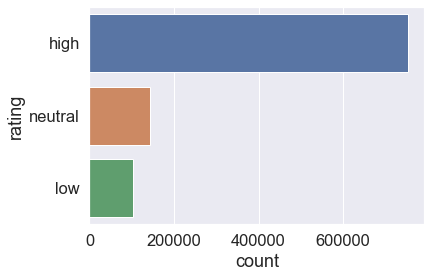

In [48]:
sns.set(font_scale=1.5)
sns.countplot(data=viz_df, y='rating', order = viz_df['rating'].value_counts().index)
plt.show()

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Most phones have high ratings, followed by neutral ratings followed by very less low rated phones.</span></h4>
</blockquote>


In [49]:
temp_df = pd.DataFrame(viz_df.company.value_counts().head(40))
temp_df.T

,samsung,nokia,lg,sony,motorola,apple,huawei,htc,lenovo,blackberry,...,palm,thl,bq,caterpillar,vodafone,blackview,siemens,rim,archos,oppo
company,261432,120762,84077,79602,64050,62733,50908,49679,32496,23164,...,1564,1513,1449,1400,1373,1327,1293,1284,1137,1128


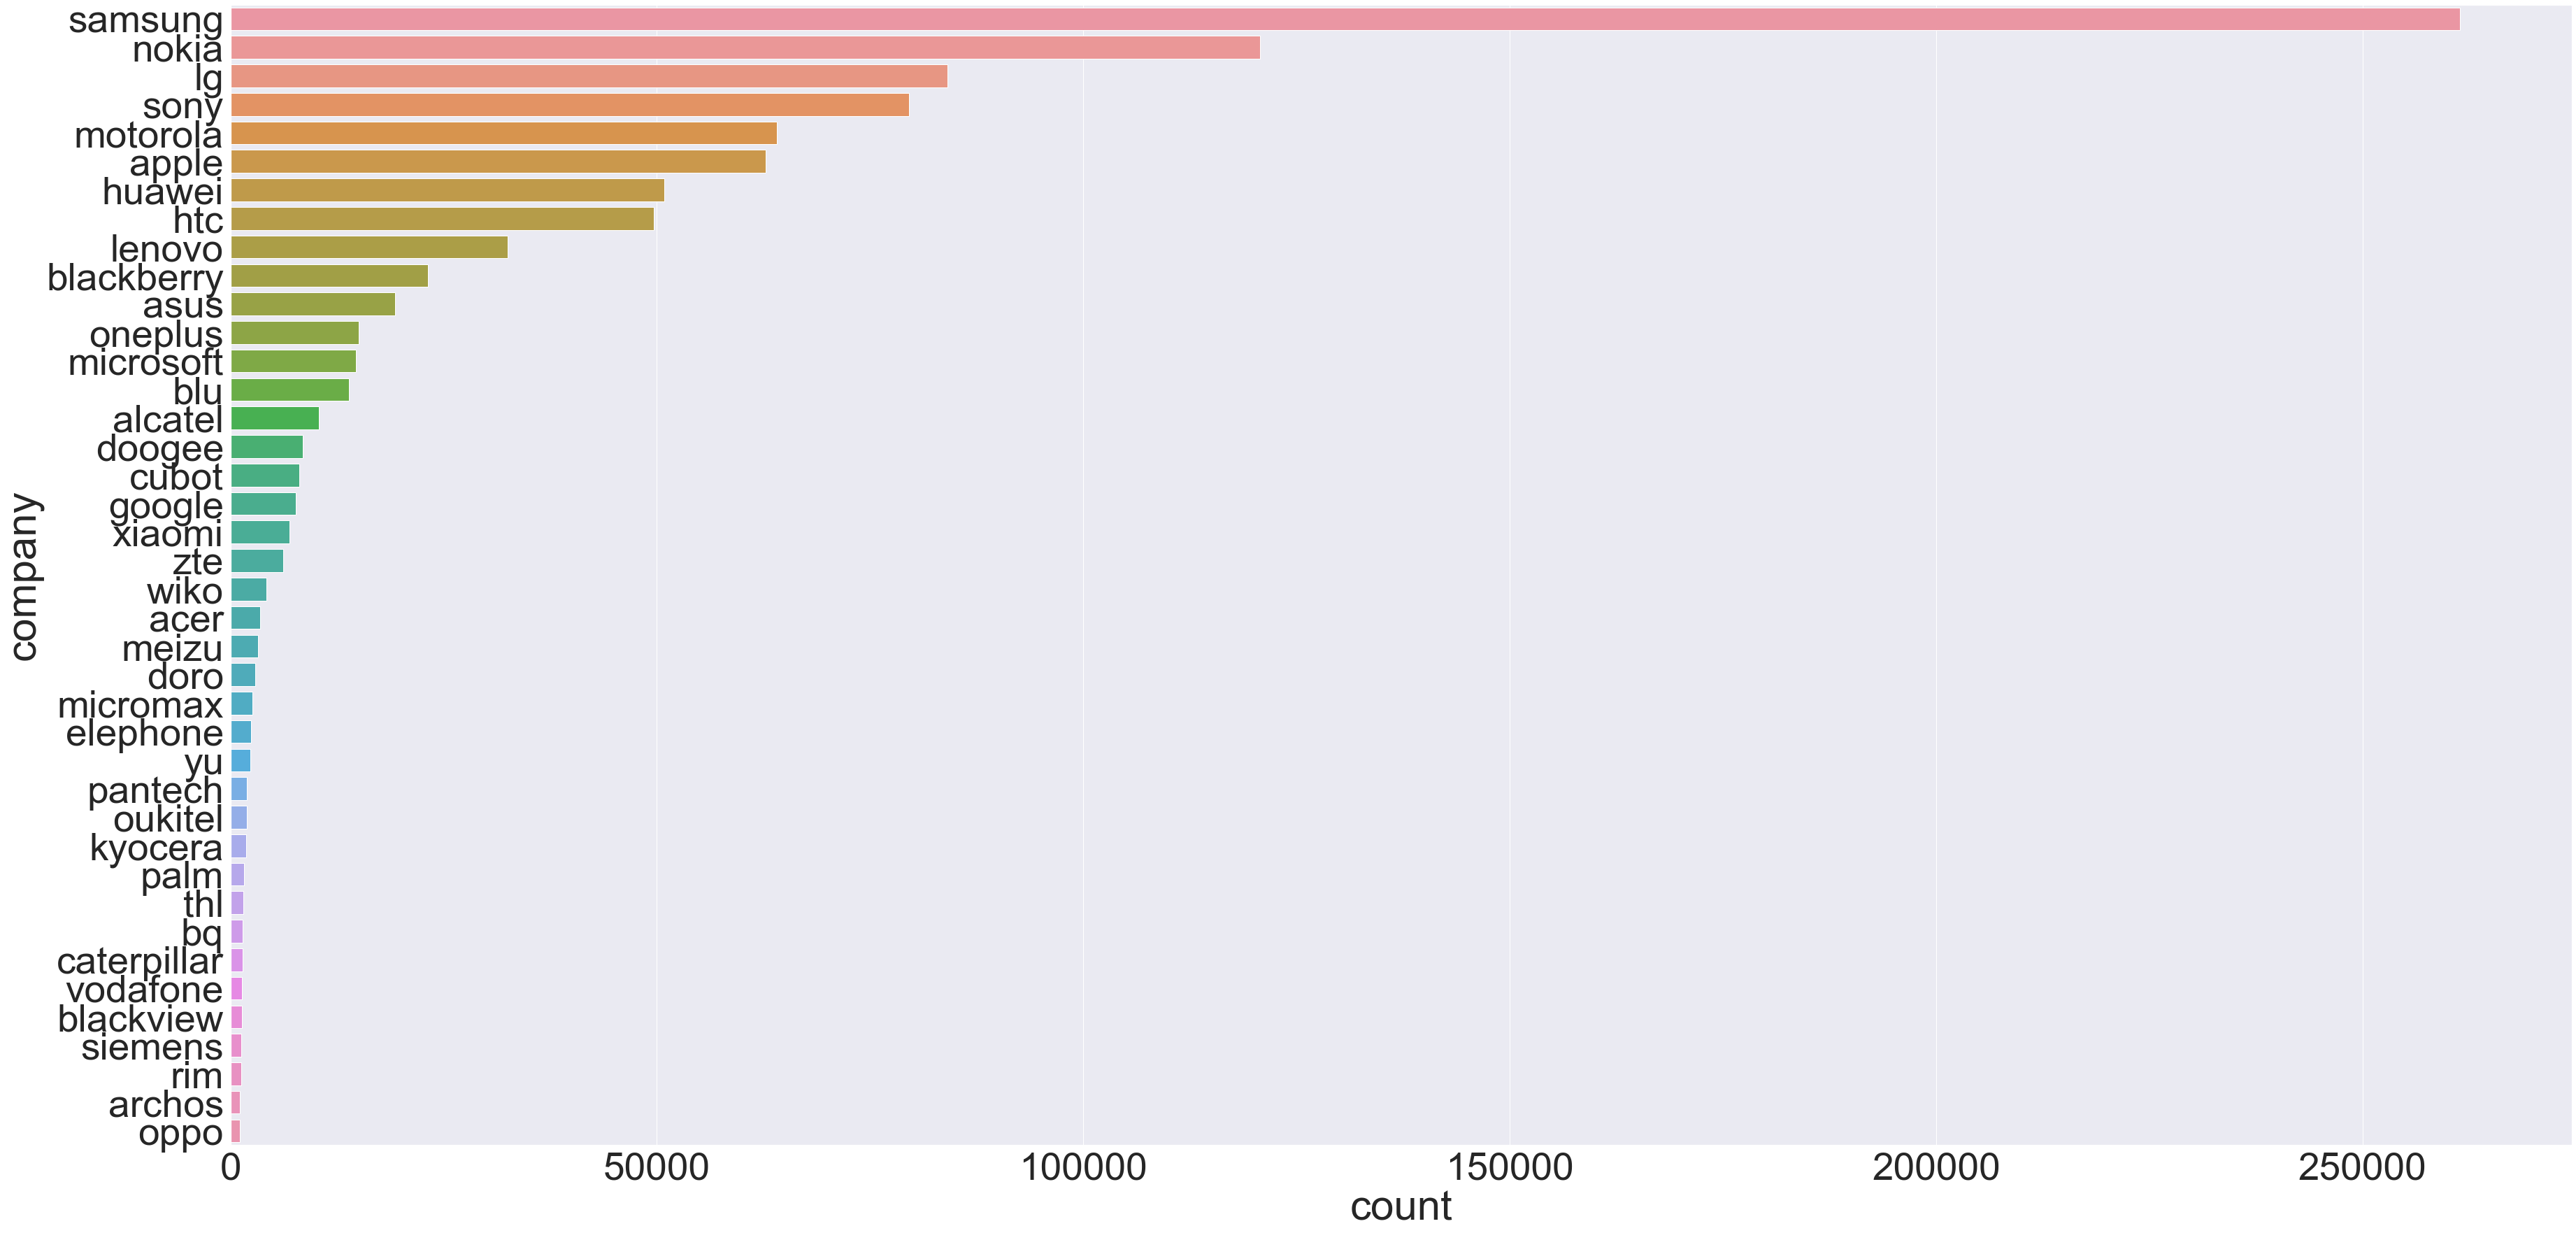

In [50]:
sns.set(font_scale=5)
plt.figure(figsize=(60, 30))
top_40_comapnies = list(temp_df.index.unique())
temp_df_ = viz_df[viz_df.company.isin(top_40_comapnies)]
sns.countplot(data=temp_df_, y='company', order = temp_df_['company'].value_counts().index)
plt.show()

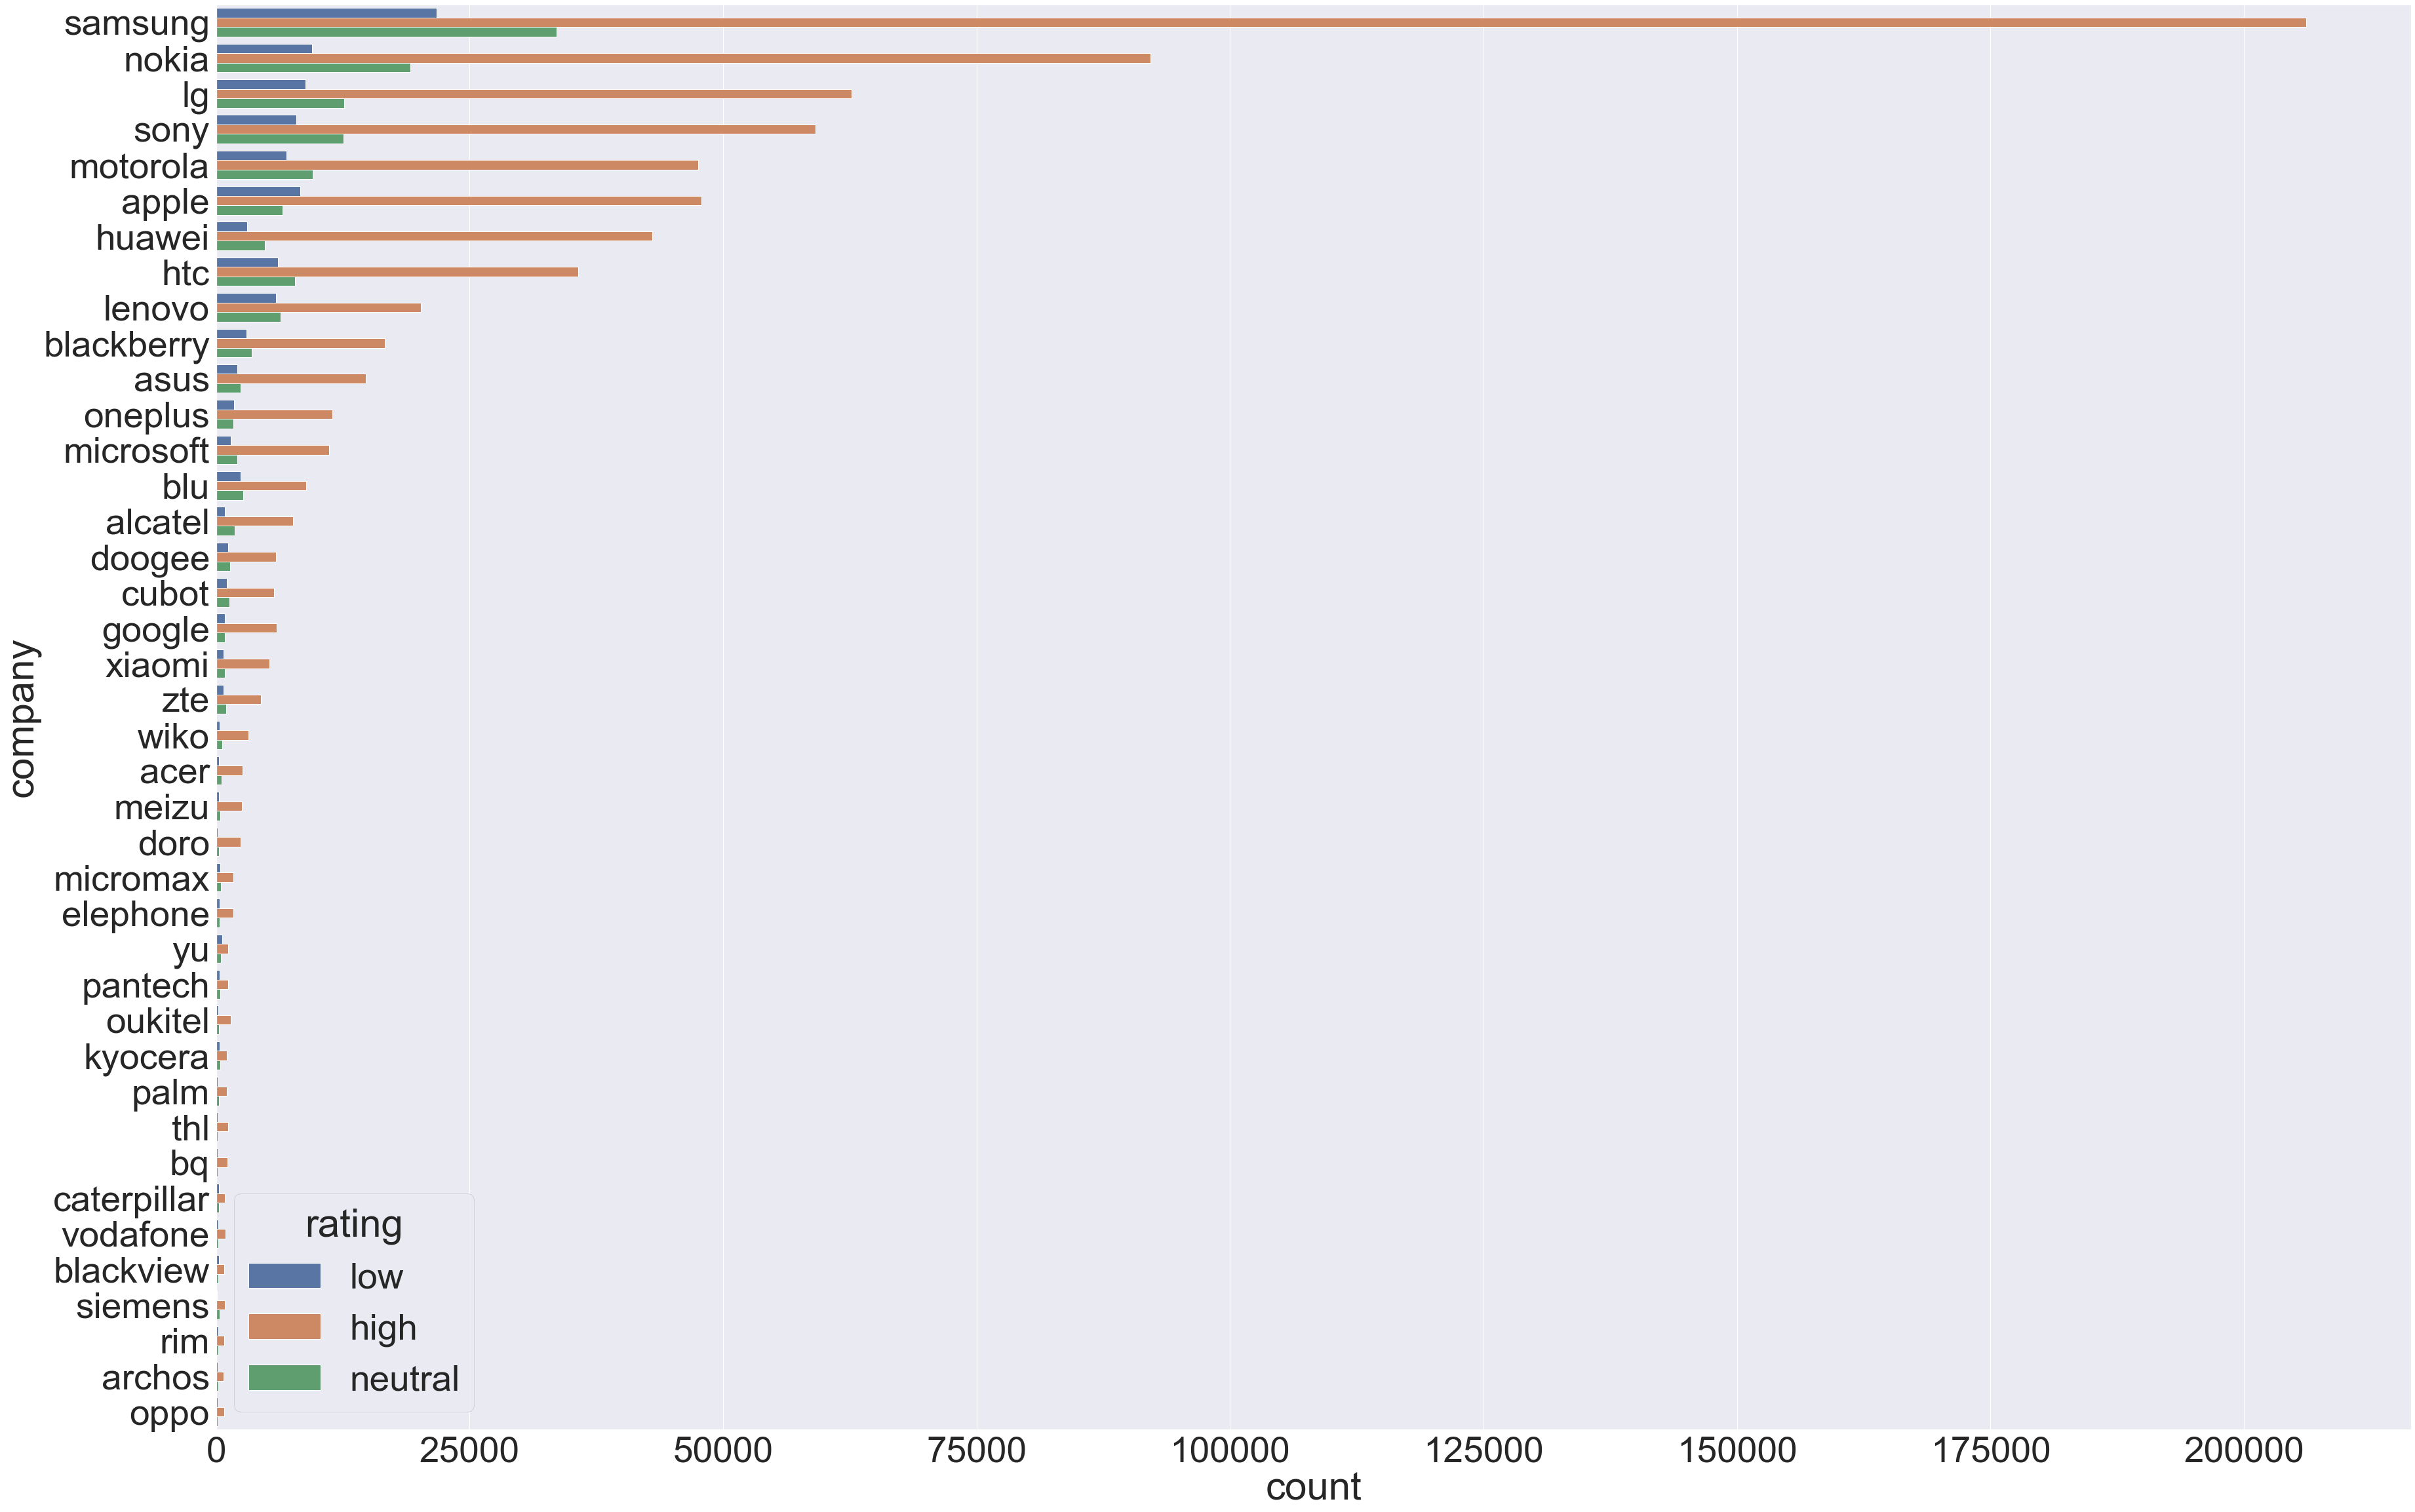

In [51]:
sns.set(font_scale=5)
plt.figure(figsize=(60, 40))
top_40_comapnies = list(temp_df.index.unique())
temp_df_ = viz_df[viz_df.company.isin(top_40_comapnies)]
sns.countplot(data=temp_df_, y='company', order = temp_df_['company'].value_counts().index, hue = 'rating')
plt.show()

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">A few companies like samsung, nokia, lg, sony... seem to have the most number of reviews in our dataset indicative of their market share in the phones market in the given timeperiod fo 2007-2017. Also, we can see that most ratings for all companies seem to be high, and relatively less neutral ratings</span></h4>
</blockquote>

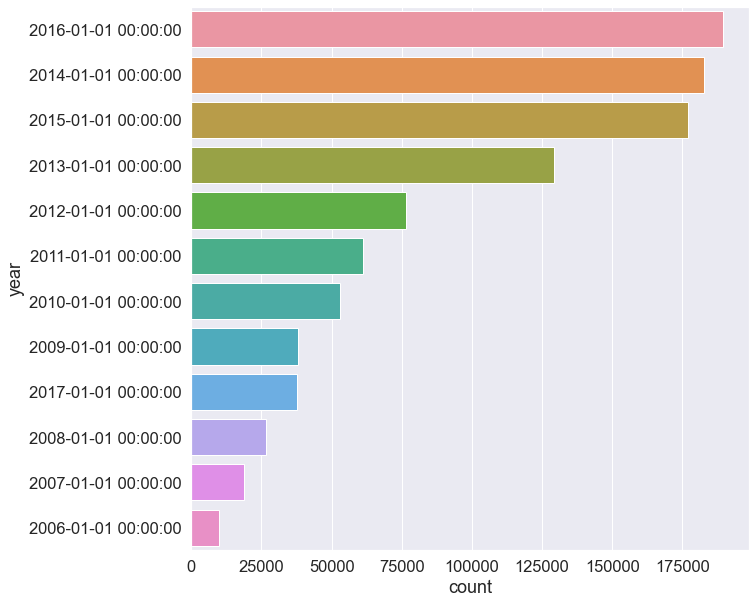

In [52]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 10))
sns.countplot(data=viz_df, y='year', order = viz_df['year'].value_counts().index)
plt.show()

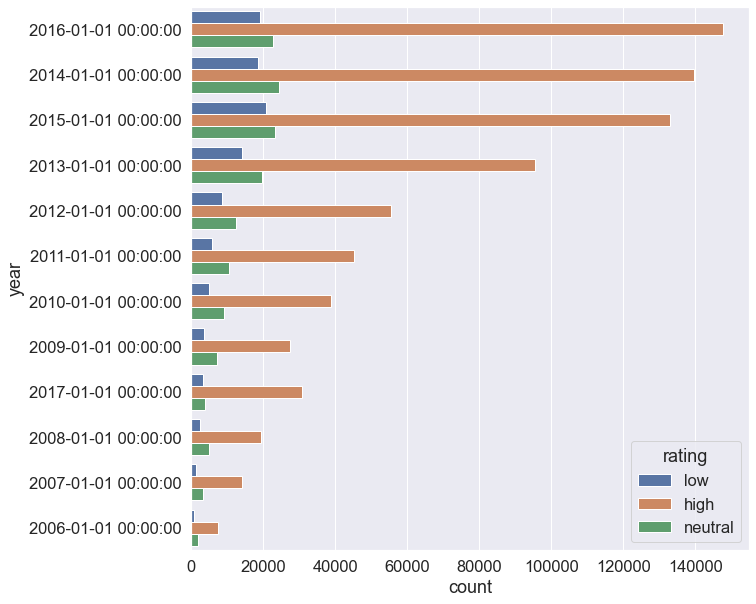

In [53]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 10))
sns.countplot(data=viz_df, y='year', order = viz_df['year'].value_counts().index, hue='rating')
plt.show()

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Most reviews are from the years 2014, 2015 and 2016 in our dataset. This might cause unnecessary bias for that time period and the predictions might not extend well into the future if the dataset is static</span></h4>
</blockquote>

In [54]:
temp_df = pd.DataFrame(viz_df.phone_model.value_counts().head(40))
temp_df.T

,samsung-galaxy-s6,samsung-galaxy-s7-edge,apple-iphone-5s,samsung-galaxy-s5,motorola-moto-g,samsung-galaxy-s7-789999,huawei-p8-lite,samsung-i9500-galaxy-s-iv,samsung-galaxy-s-iii,lenovo-vibe-k4-note,...,samsung-galaxy-note-4,samsung-galaxy-s6-edgeplus,samsung-galaxy-j5,samsung-galaxy-ace-s5830,nokia-lumia-520,motorola-moto-g3,motorola-moto-g4,samsung-galaxy-note-2,microsoft-lumia-640-dual-sim,apple-iphone-7
phone_model,12831,12528,12248,12033,11810,10797,10099,10043,8516,7863,...,3933,3839,3815,3809,3709,3672,3605,3547,3519,3499


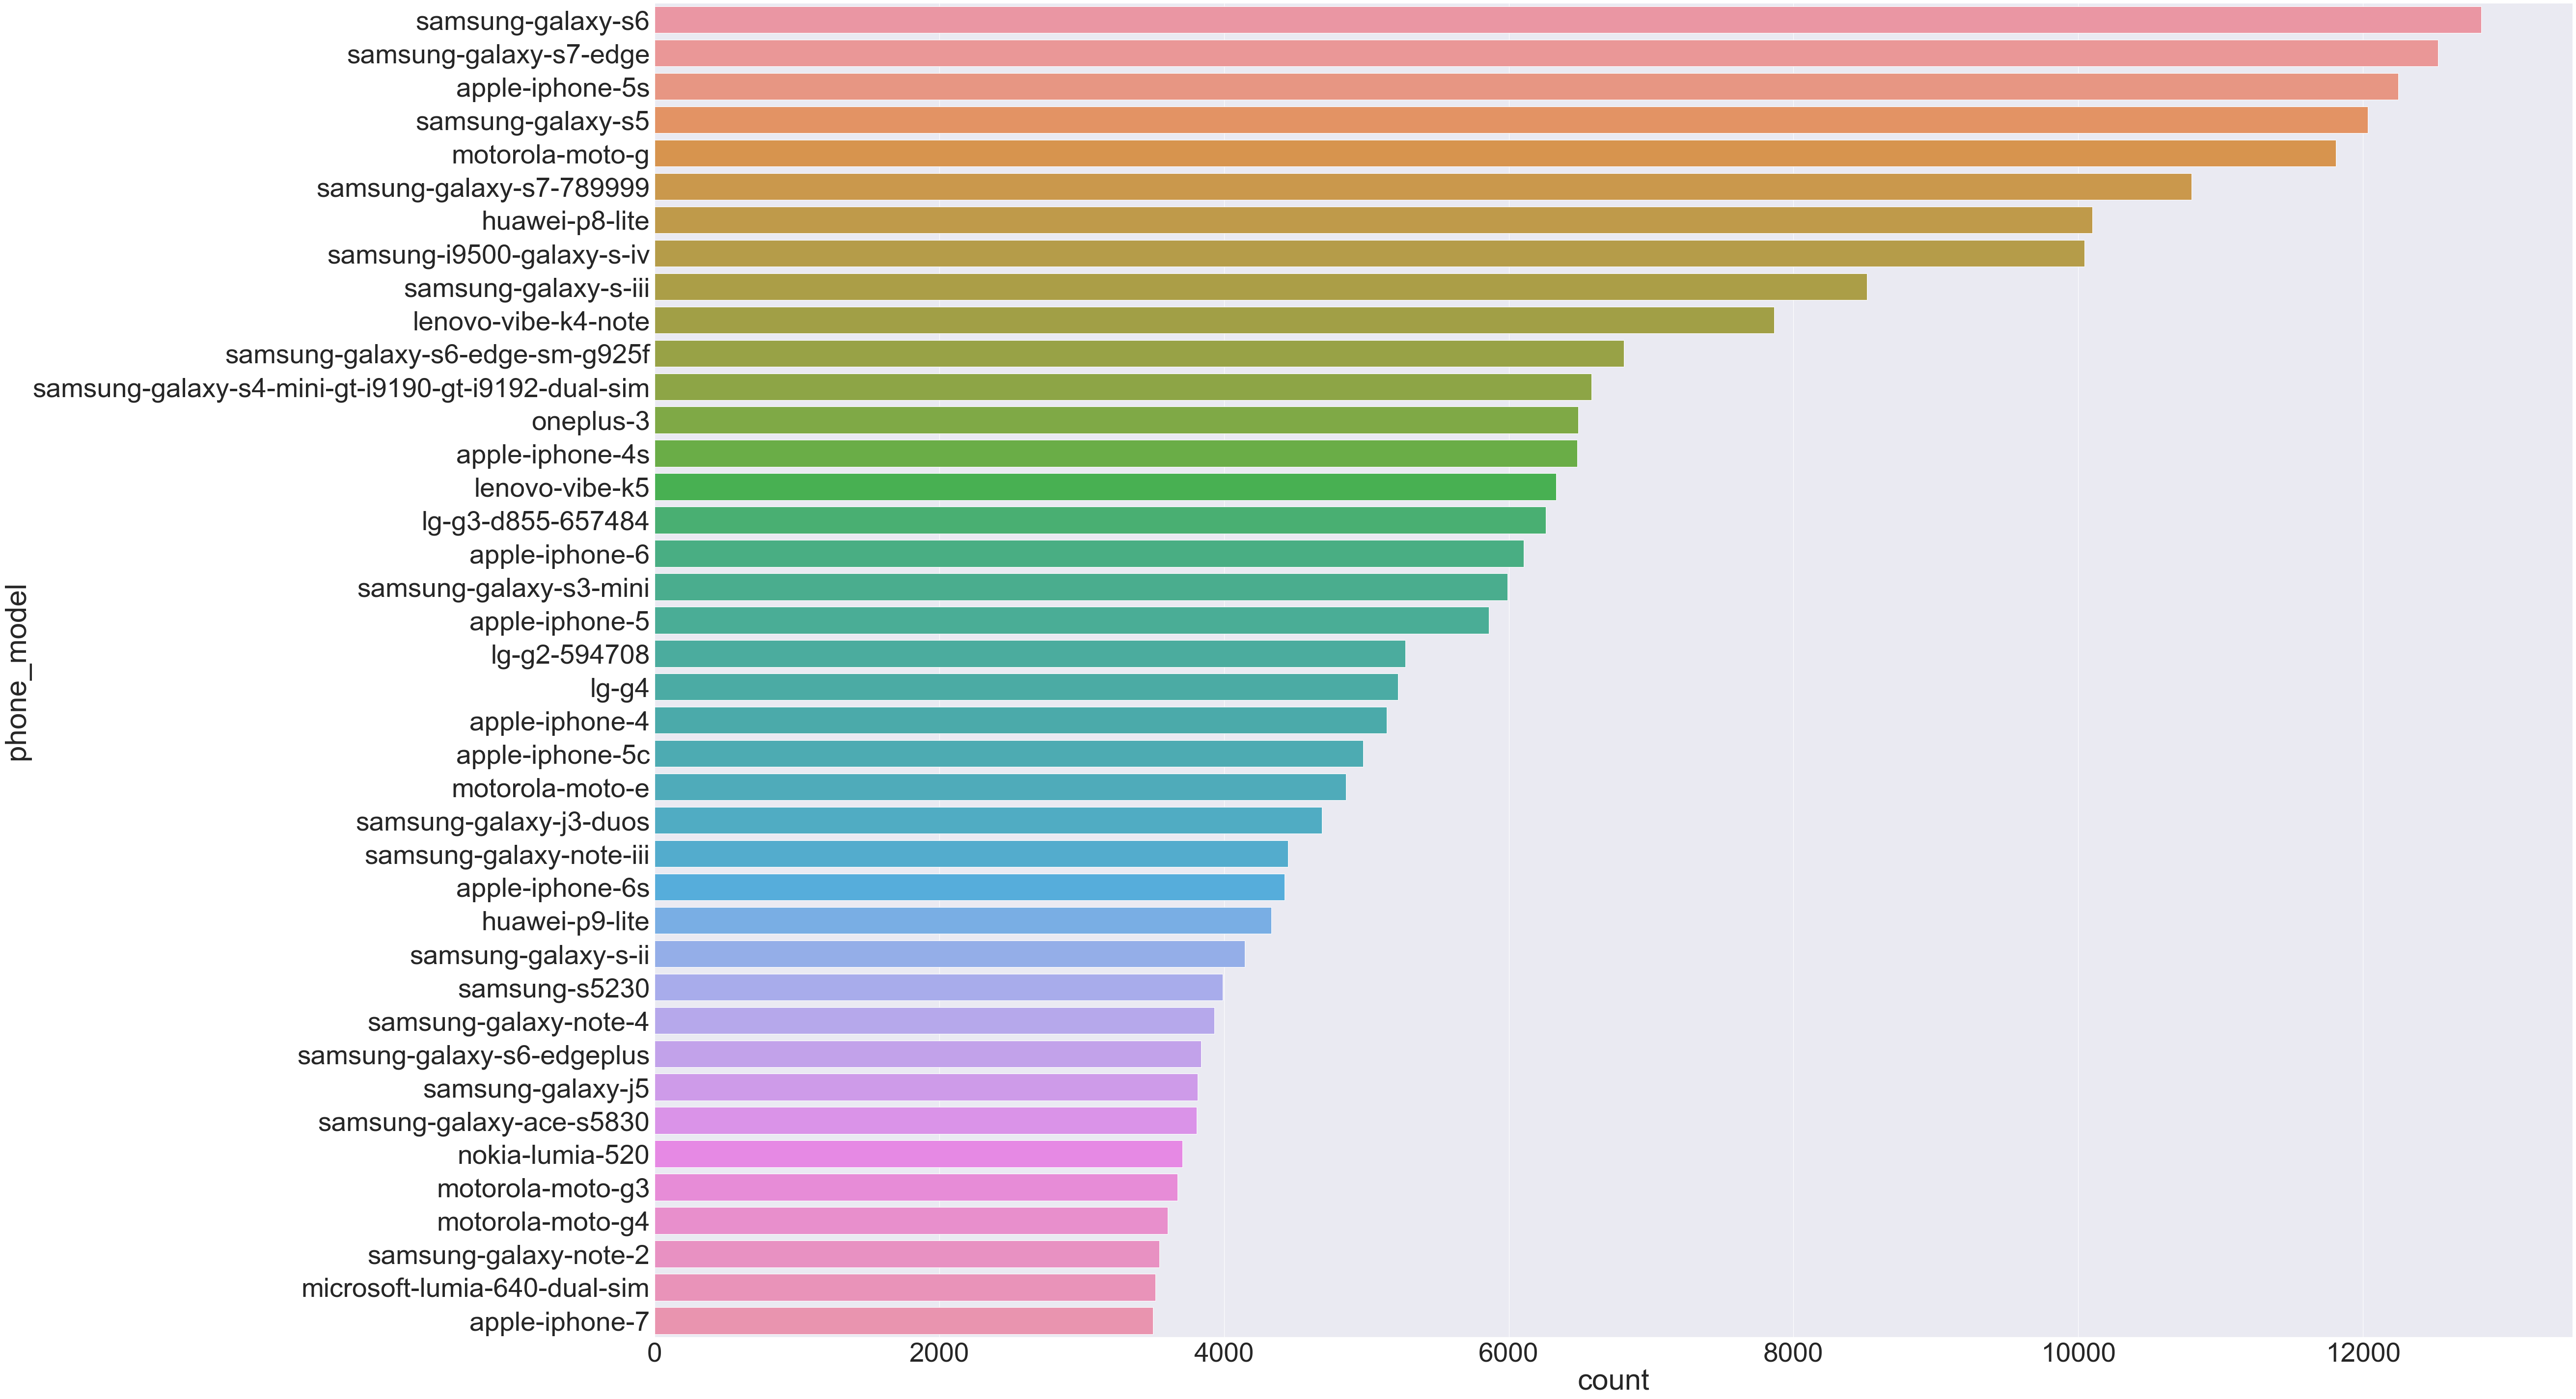

In [55]:
sns.set(font_scale=5)
plt.figure(figsize=(70, 50))
top_40_phones = list(temp_df.index.unique())
temp_df_ = viz_df[viz_df.phone_model.isin(top_40_phones)]
sns.countplot(data=temp_df_, y='phone_model', order = temp_df_['phone_model'].value_counts().index)
plt.show()

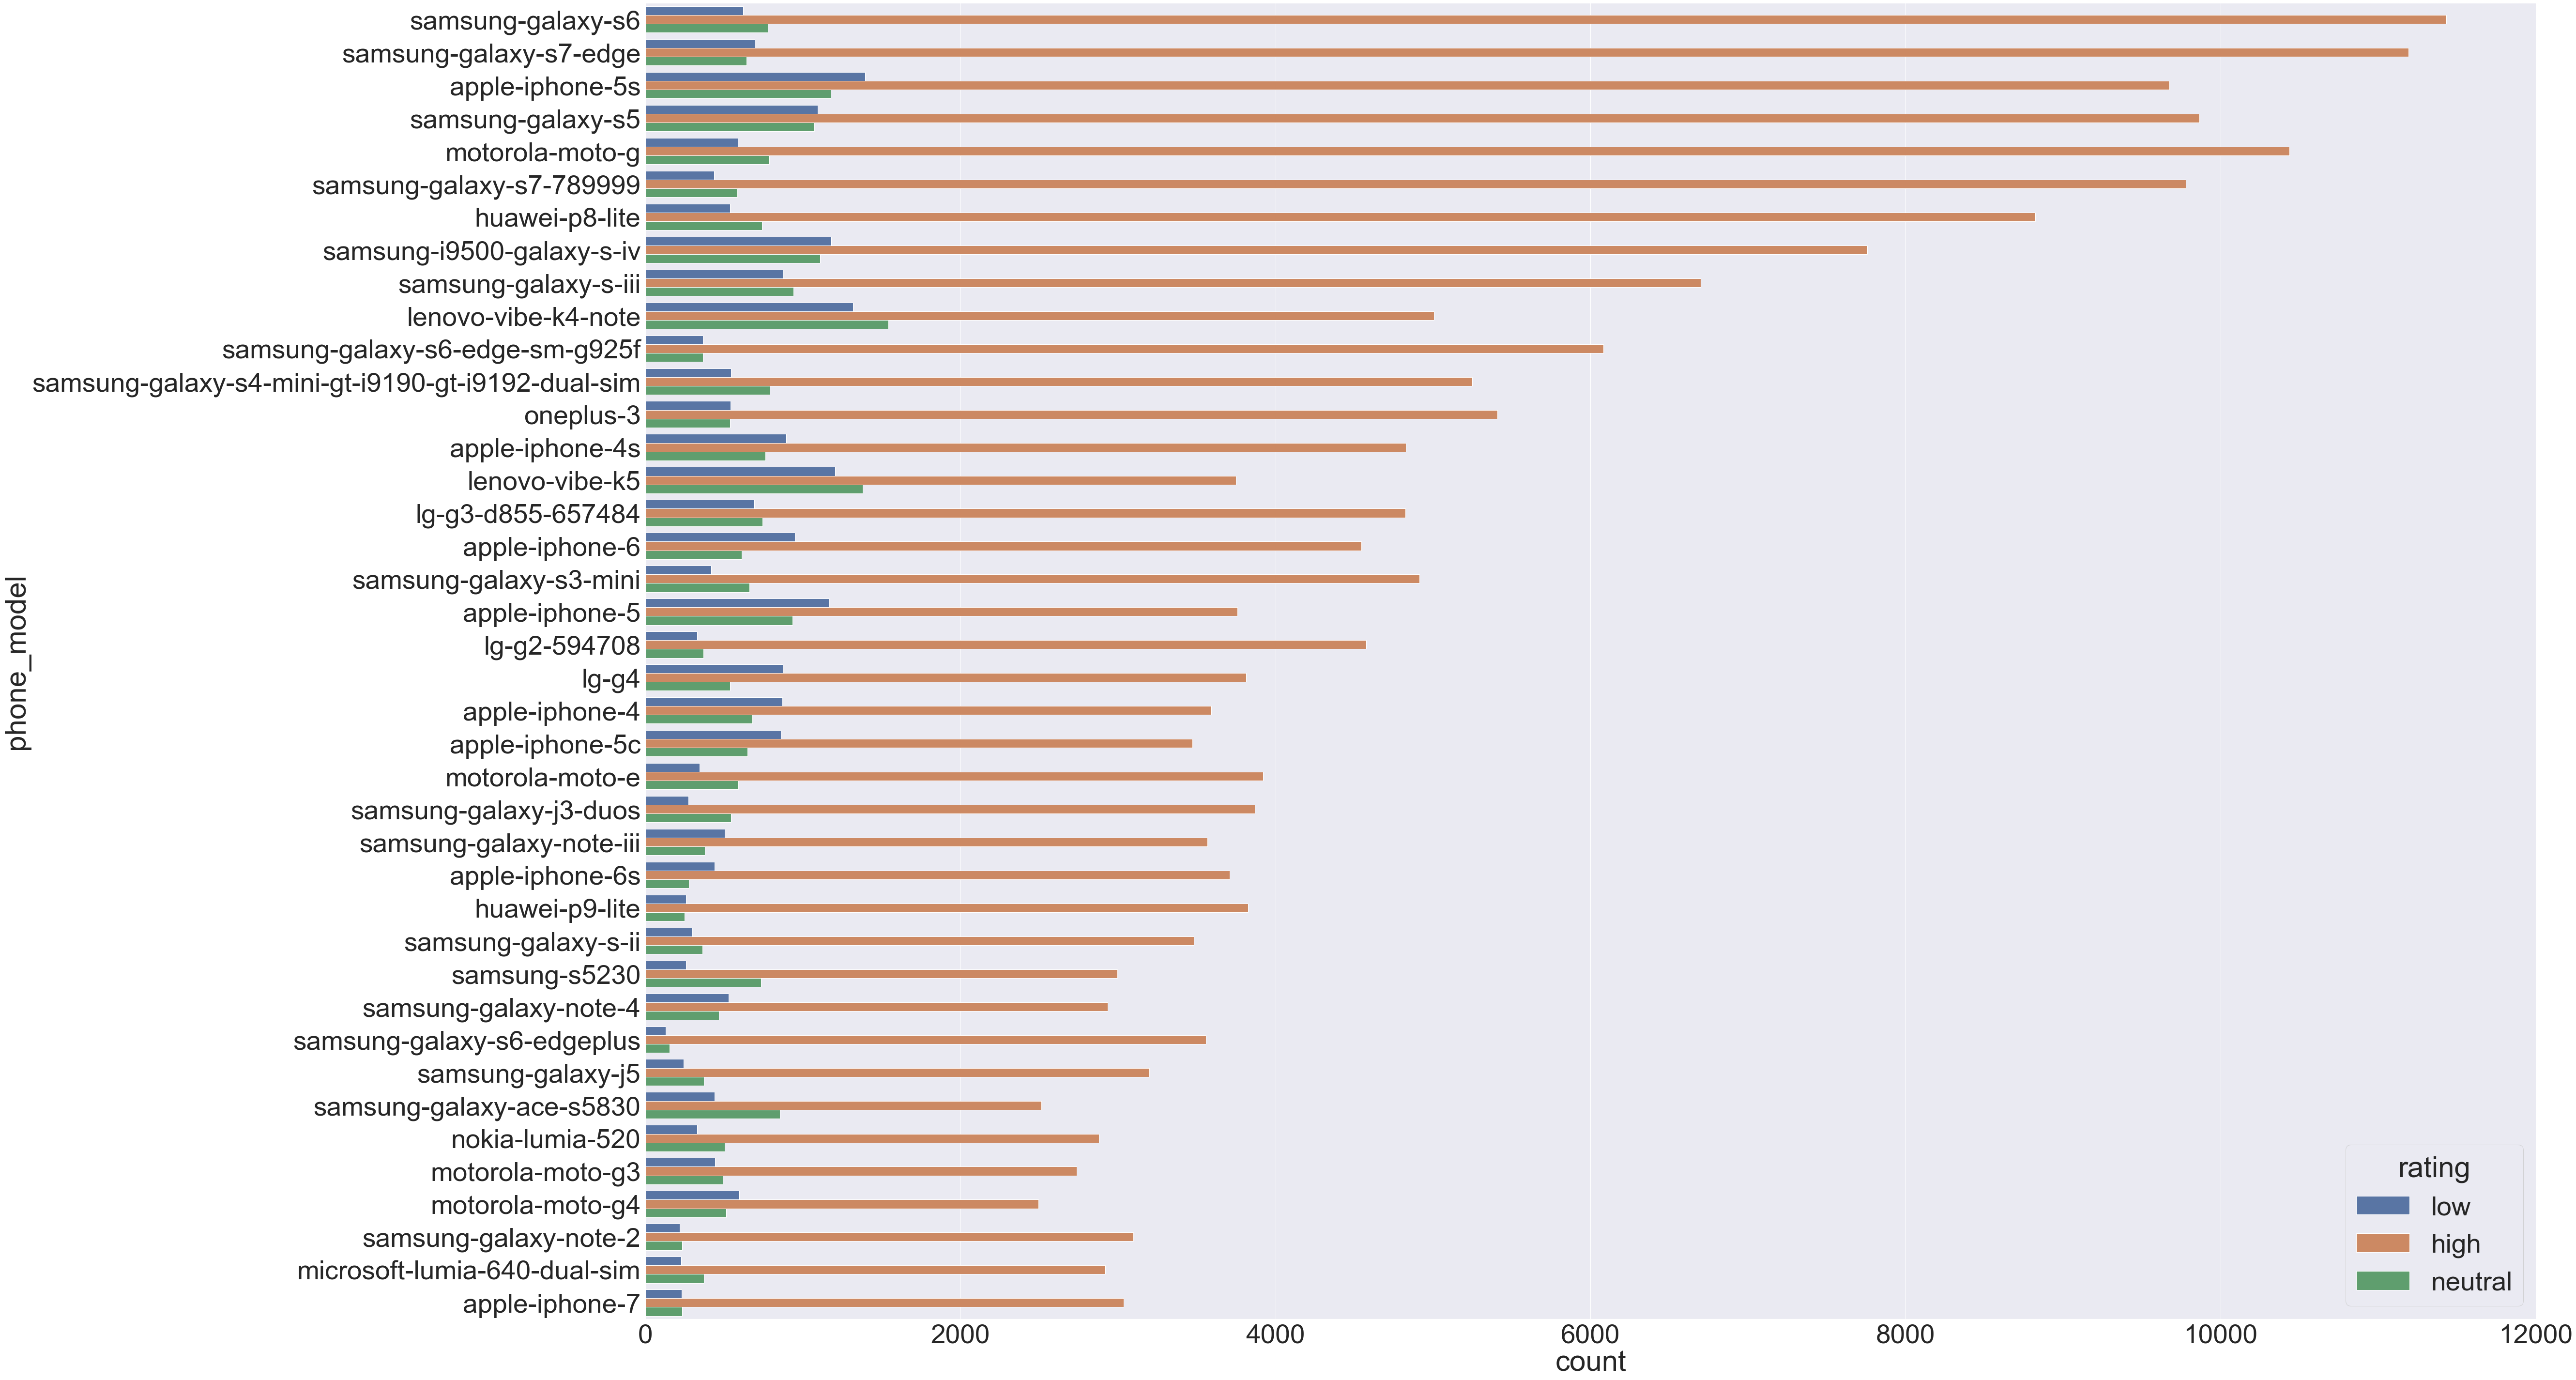

In [56]:
sns.set(font_scale=5)
plt.figure(figsize=(70, 50))
top_40_phones = list(temp_df.index.unique())
temp_df_ = viz_df[viz_df.phone_model.isin(top_40_phones)]
sns.countplot(data=temp_df_, y='phone_model', order = temp_df_['phone_model'].value_counts().index, hue='rating')
plt.show()

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">A few phones like galaxy s6, s7 and moto g ..etcs., have relatively the most number of reviews and also the most number of high ratings than low, neutral ratings. iphone 5s and other non-flagship phones at the time have good nunmber of high ratings but relatively more number of low, neutral ratings as well</span></h4>
</blockquote>


In [57]:
temp_df = pd.DataFrame(viz_df.user.value_counts().head(40))
temp_df.T

,Amazon Customer,Cliente Amazon,e-bit,Client d'Amazon,Amazon Kunde,einer Kundin,Anonymous,einem Kunden,unknown,Anonymous,...,Peter,�ндрей,Carlos,Mike,�лек�ей,Stefano,Fabio,Gast,Paul,Го�ть
user,62546,15696,6843,6289,3811,2115,2093,1539,1402,1163,...,379,375,368,366,364,334,322,320,320,314


C:\Users\surya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\surya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


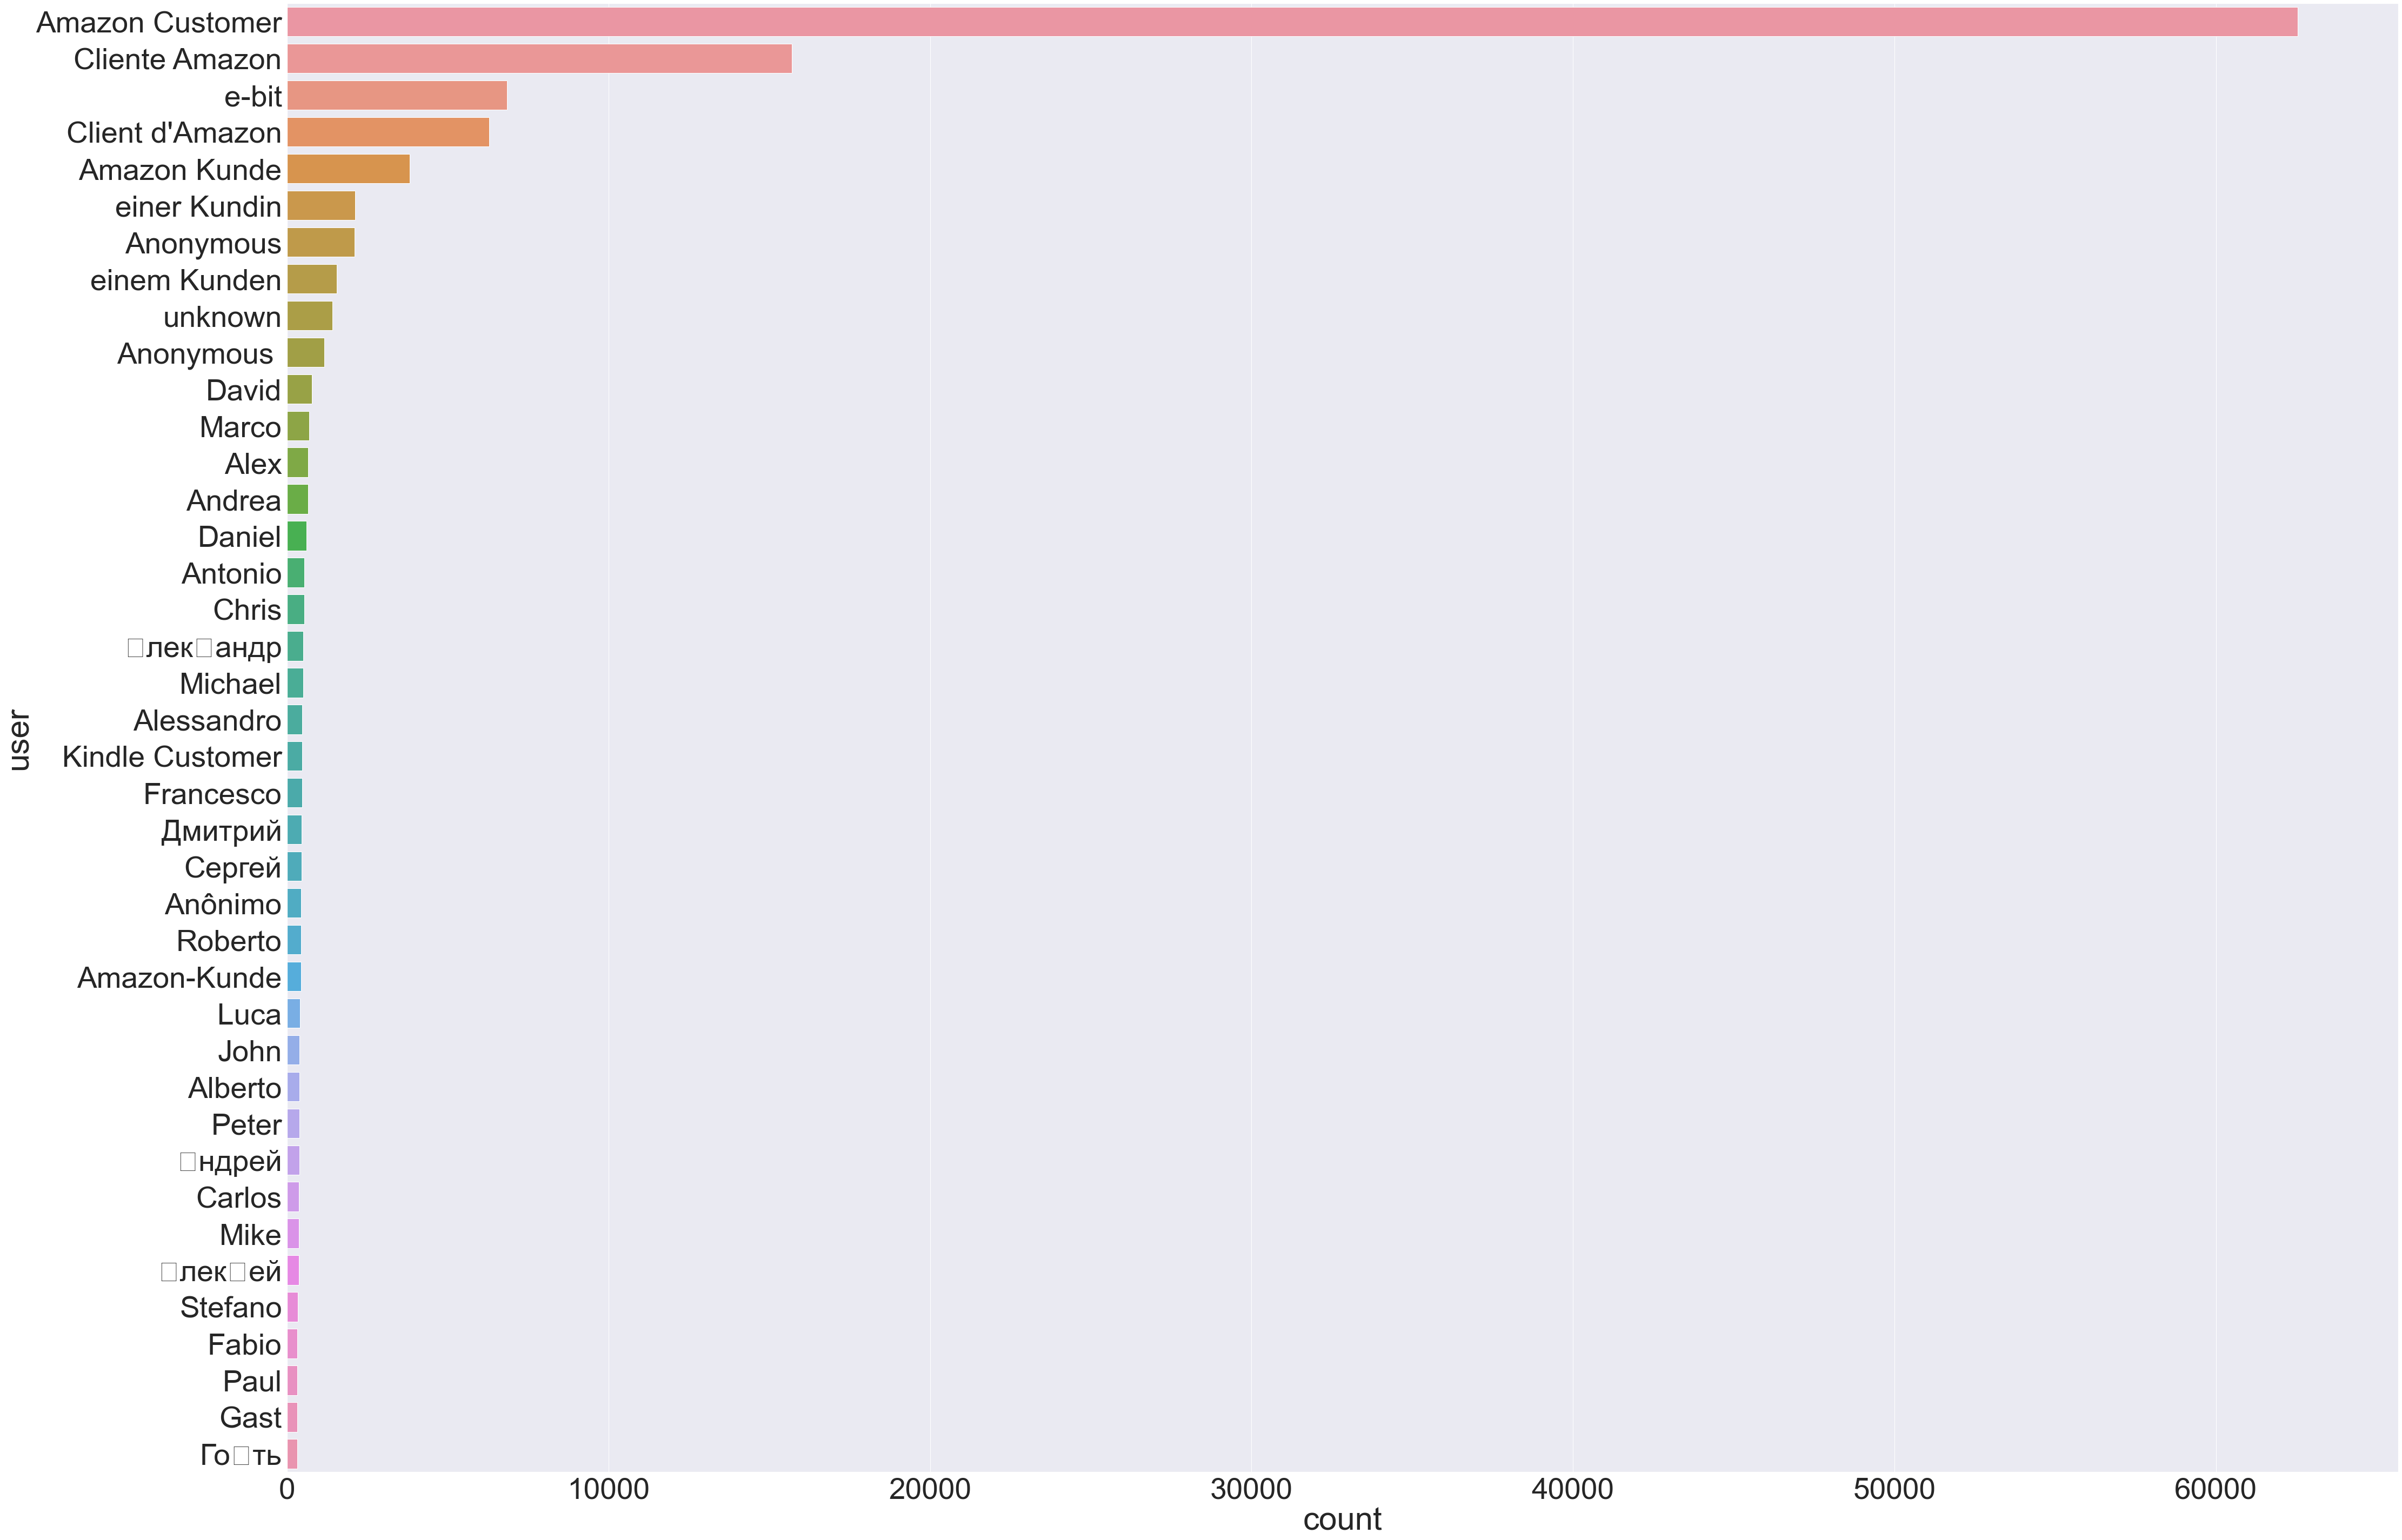

In [58]:
sns.set(font_scale=5)
plt.figure(figsize=(70, 50))
top_40_users = list(temp_df.index.unique())
temp_df_ = viz_df[viz_df.user.isin(top_40_users)]
sns.countplot(data=temp_df_, y='user', order = temp_df_['user'].value_counts().index)
plt.show()

C:\Users\surya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\surya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


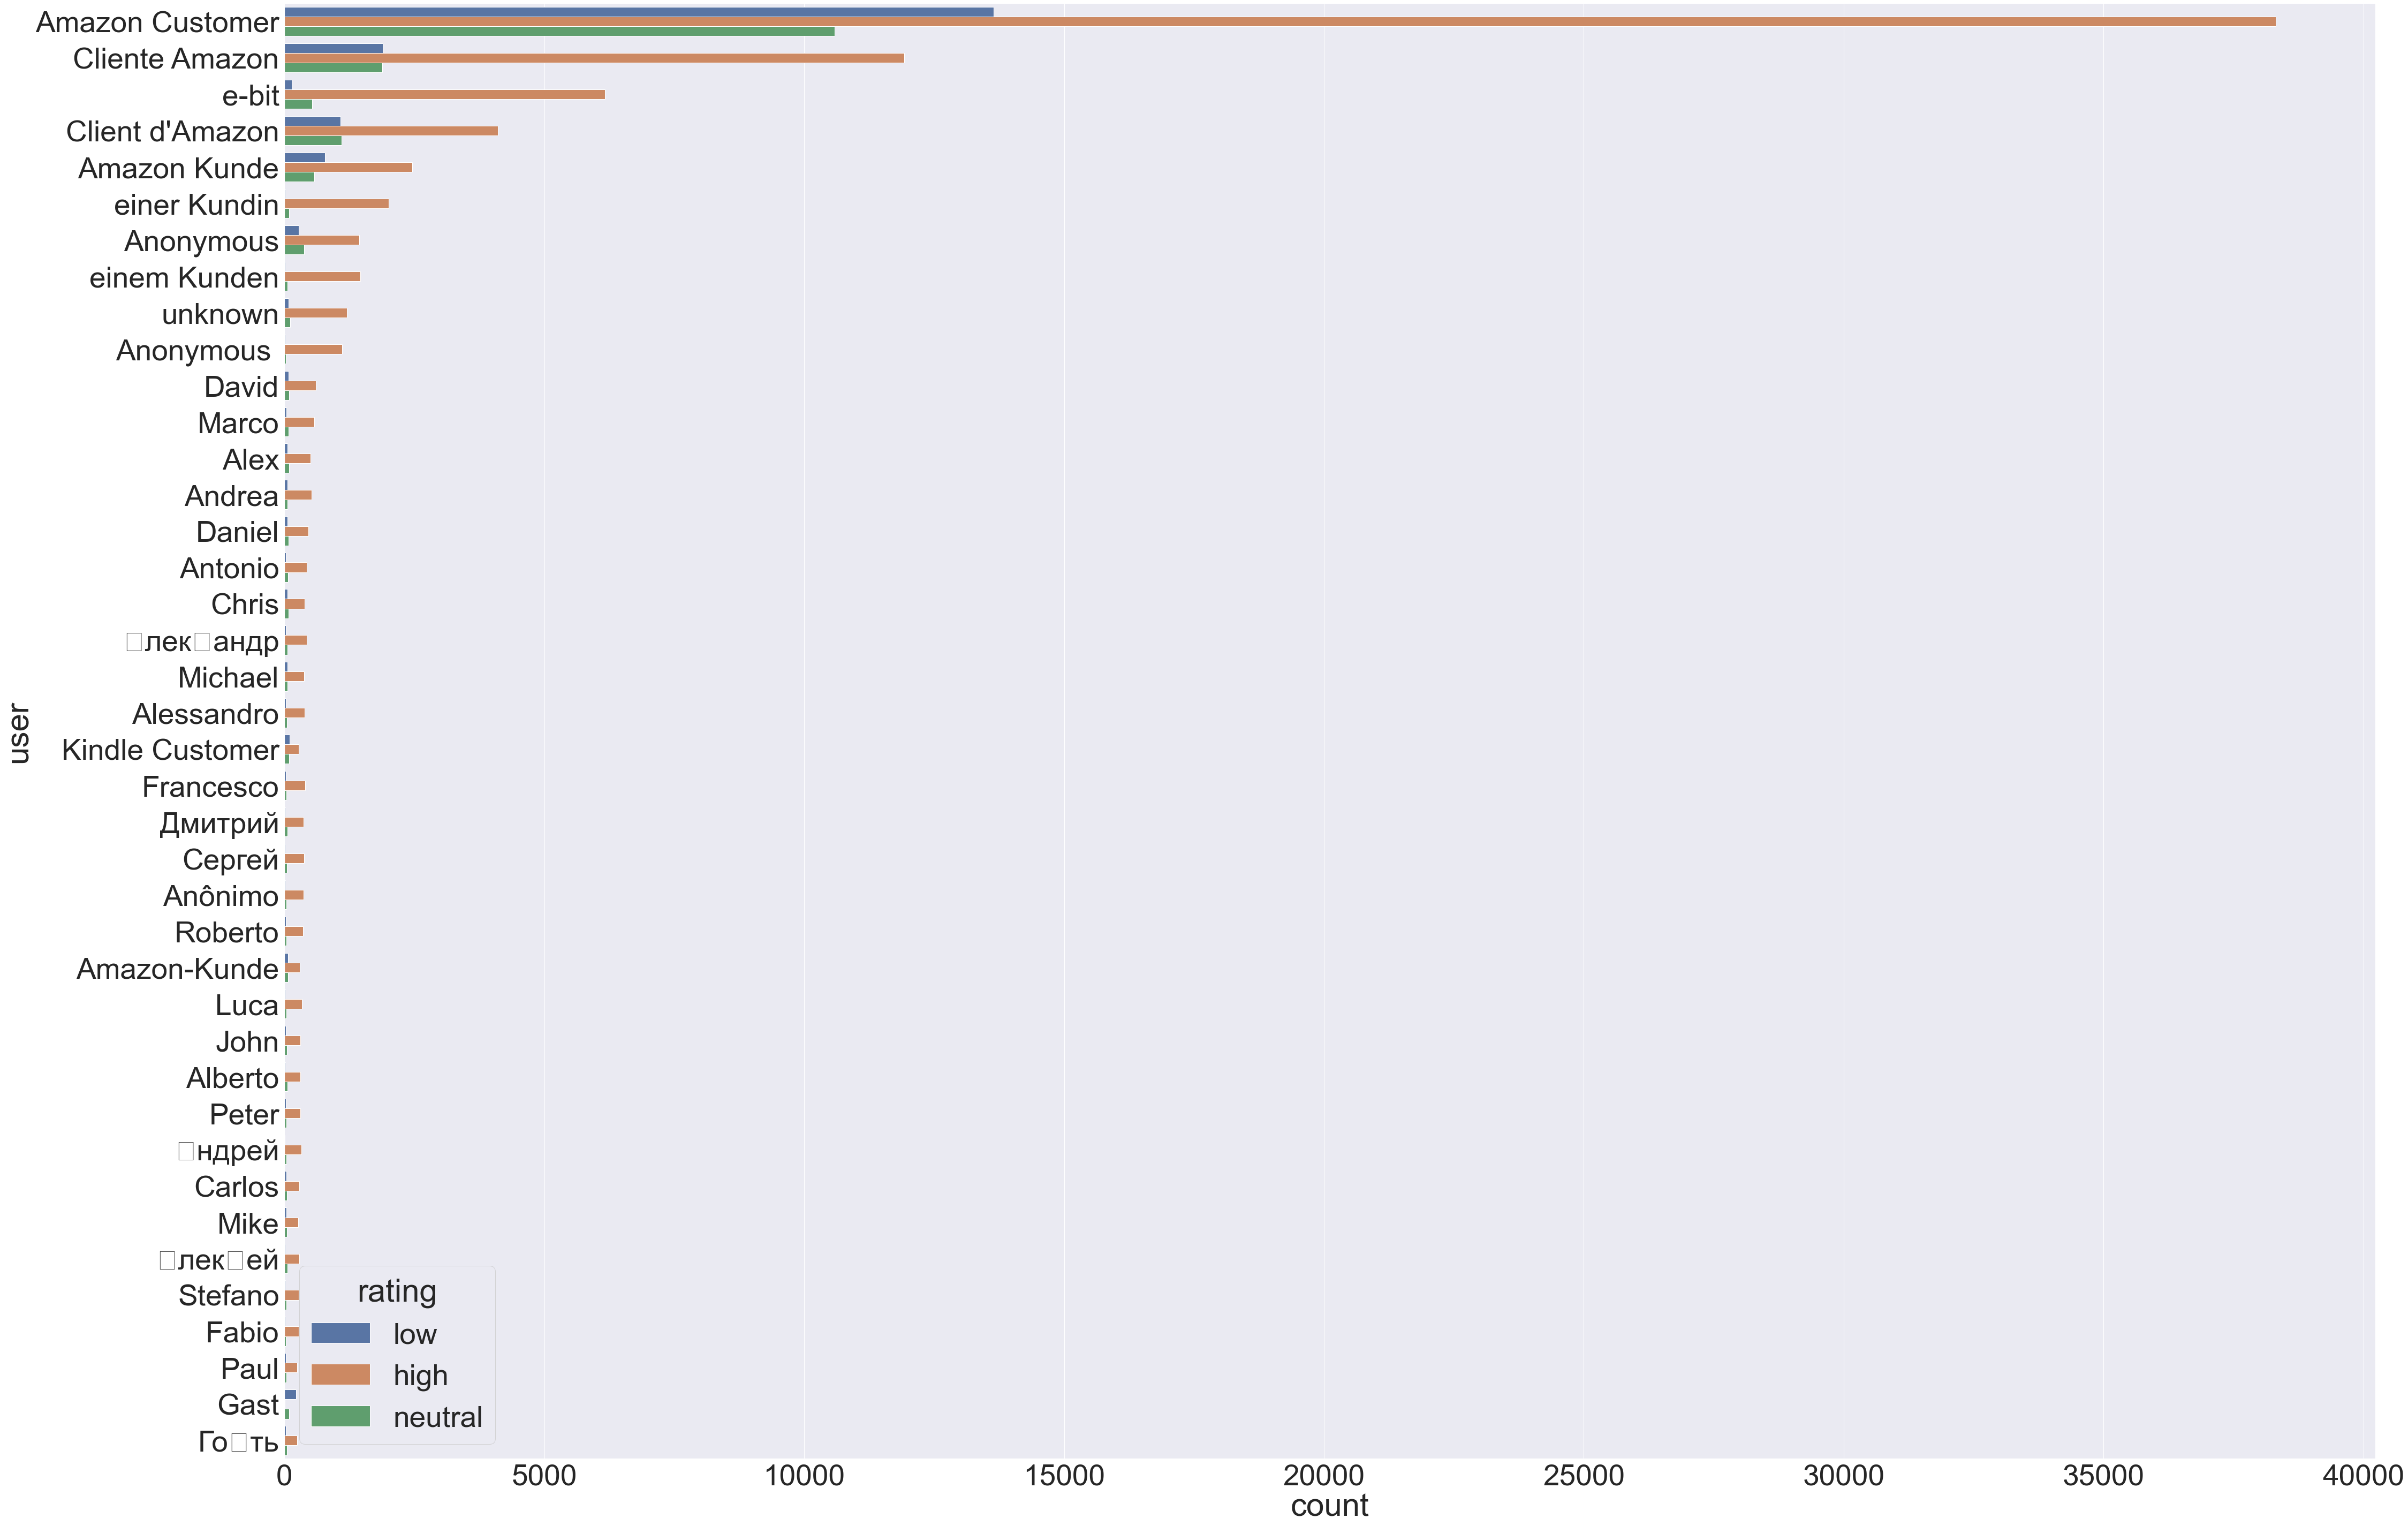

In [60]:
sns.set(font_scale=5)
plt.figure(figsize=(70, 50))
top_40_users = list(temp_df.index.unique())
temp_df_ = viz_df[viz_df.user.isin(top_40_users)]
sns.countplot(data=temp_df_, y='user', order = temp_df_['user'].value_counts().index, hue= 'rating')
plt.show()

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">The top 40 users with the most amount of reviews. Some users seem to be generic accounts (Amazon Customer, Client Amazon, Anonymous, Anonimo, unknown...) with many reviews. This might affect personlization of the user-based collaborative filtering.</span></h4>
</blockquote>

In [61]:
# Select the data with products having more than 50 ratings and users who have given more than 50 ratings
temp_df = pd.DataFrame(selected_df.user.value_counts())
temp_df = temp_df[temp_df.user > 50]
atleast_50_users = list(temp_df.index)
pprint(atleast_50_users[:50], compact=True)

['Amazon Customer', 'Cliente Amazon', 'e-bit', "Client d'Amazon",
 'Amazon Kunde', 'einer Kundin', 'Anonymous', 'einem Kunden', 'unknown',
 'Anonymous ', 'David', 'Marco', 'Alex', 'Andrea', 'Daniel', 'Antonio', 'Chris',
 '�лек�андр', 'Michael', 'Kindle Customer', 'Alessandro', 'Francesco', 'Сергей',
 'Дмитрий', 'Anônimo', 'Roberto', 'Amazon-Kunde', 'Luca', 'John', 'Alberto',
 'Peter', '�ндрей', 'Carlos', 'Mike', '�лек�ей', 'Stefano', 'Fabio', 'Gast',
 'Paul', 'Го�ть', 'Thomas', 'Giuseppe', 'Jose', 'Laura', 'anonieme bezoeker',
 'Christian', 'Davide', 'Javier', 'Paolo', 'Martin']


In [62]:
temp_df = pd.DataFrame(selected_df.phone_model.value_counts())
temp_df = temp_df[temp_df.phone_model > 50]
atleast_50_phones = list(temp_df.index)
pprint(atleast_50_phones[:50], compact=True)

['samsung-galaxy-s6', 'samsung-galaxy-s7-edge', 'apple-iphone-5s',
 'samsung-galaxy-s5', 'motorola-moto-g', 'samsung-galaxy-s7-789999',
 'huawei-p8-lite', 'samsung-i9500-galaxy-s-iv', 'samsung-galaxy-s-iii',
 'lenovo-vibe-k4-note', 'samsung-galaxy-s6-edge-sm-g925f',
 'samsung-galaxy-s4-mini-gt-i9190-gt-i9192-dual-sim', 'oneplus-3',
 'apple-iphone-4s', 'lenovo-vibe-k5', 'lg-g3-d855-657484', 'apple-iphone-6',
 'samsung-galaxy-s3-mini', 'apple-iphone-5', 'lg-g2-594708', 'lg-g4',
 'apple-iphone-4', 'apple-iphone-5c', 'motorola-moto-e',
 'samsung-galaxy-j3-duos', 'samsung-galaxy-note-iii', 'apple-iphone-6s',
 'huawei-p9-lite', 'samsung-galaxy-s-ii', 'samsung-s5230',
 'samsung-galaxy-note-4', 'samsung-galaxy-s6-edgeplus', 'samsung-galaxy-j5',
 'samsung-galaxy-ace-s5830', 'nokia-lumia-520', 'motorola-moto-g3',
 'motorola-moto-g4', 'samsung-galaxy-note-2', 'microsoft-lumia-640-dual-sim',
 'apple-iphone-7', 'lg-google-nexus-5', 'nokia-5800-xpressmusic-tube',
 'google-nexus-5x-h791', 'htc-one-m7

In [64]:
# remove users and phones with less than 50 ratings
train_df = selected_df.copy()
train_df = train_df[train_df.user.isin(atleast_50_users)]
train_df = train_df[train_df.phone_model.isin(atleast_50_phones)]
train_df.sample(7)

,lang,score,review,user,phone_model,year,company
833023,es,8,"Gran teléfono, con buena manejabilidad, pantal...",Cliente Amazon,motorola-moto-g,2014-01-01,motorola
367902,en,6,Cheap plastic metal delivered. Anyway phone wa...,Amazon Customer,htc-desire-620g,2015-01-01,htc
618742,en,10,I bought this just after Christmas after seein...,Chris,motorola-xt1225,2017-01-01,motorola
125910,en,2,The cam wasn't working,Amazon Customer,samsung-galaxy-s7-789999,2016-01-01,samsung
863045,en,8,"Good mobile, HD screen awsome to watch movies ...",Amazon Customer,motorola-moto-g4,2016-01-01,motorola
863432,en,6,"Amazing phone, this saves your time and throws...",Amazon Customer,motorola-moto-g4,2016-01-01,motorola
714098,en,10,Ok lo escribo en español para que quede claro ...,Juan Carlos,blackberry-9630,2009-01-01,blackberry


<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Reviews in 21 differente languages,transalte other languages to english to use those reviews</span></h4>
</blockquote>

In [65]:
len(full_df.lang.value_counts()) 

20

In [66]:
# to translate between languages using multiple models and tools
# !pip install -q -U deep_translator

In [67]:
from deep_translator import GoogleTranslator
translated = GoogleTranslator(source='auto', target='de').translate("keep it up, you are awesome")  # output -> Weiter so, du bist großartig
translated

'Weiter so, du bist großartig'

In [68]:
# translate reviews to english

%%time
import swifter
from collections import defaultdict

translators = defaultdict()
languages = list(sampled_df.lang.unique())
languages.remove('en')
pprint(languages, compact=True)

# initialize all the language translators
for lang in languages:
    translators[lang] = GoogleTranslator(source=lang, target='en')

def translate_to_en(row):
    '''translate to english using Google Translator with source from the required column'''
    text = row.review
    if row.lang != 'en' and not text.isspace():
        try:
            source = row.lang
            translated = translators[source].translate(text)
            row.review = translated
        except: pass
    row.review_en = text
    return row

# for multiprocessing in pandas apply
# !conda install -c conda-forge swifter
# or
# !pip install swifter

# train_df = train_df.swifter.apply(translate_to_en, axis=1)

# massive ammount of reviews to be translated !!!
# might take atleast a few hours depending on cpu speed
# translated reviews can be used to xtract keywords or to build deep learning models to extract sentiment

['es', 'nl', 'fr', 'it', 'ru', 'de', 'pt', 'tr', 'fi', 'sv', 'no', 'da', 'he',
 'cs', 'pl', 'hu', 'id', 'ar', 'zh']


KeyboardInterrupt: 

In [69]:
train_df.shape # final shape of dataframe

(173473, 7)

<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">3. Build a popularity based model and recommend top 5 mobile phones</span></h3>

In [71]:
train_df.groupby('phone_model')['score'].mean().sort_values(ascending=False).head(20)

phone_model
nokia-5700-xpressmusic                10.0
samsung-sgh-e200                      10.0
lenovo-p700i                          10.0
lg-200                                10.0
samsung-galaxy-s-iii-slim-sm-g3812    10.0
lg-gm205                              10.0
nokia-9300                            10.0
lg-kf700                              10.0
samsung-e1120                         10.0
meizu-mx2                             10.0
motorola-c115                         10.0
prestigio-multiphone-4500             10.0
motorola-moto-q-global                10.0
philips-xenium-x518                   10.0
motorola-w220                         10.0
motorola-w375                         10.0
mysaga-c2                             10.0
nokia-1209                            10.0
nokia-3100                            10.0
palm-treo-650                         10.0
Name: score, dtype: float64

In [73]:
train_df.groupby('phone_model')['score'].count().sort_values(ascending=False).head(20)
# doesn't consider no. of ratings for each phone and the mean of ratings might be affected by outliers !!
# might give unintuitive recommendations

phone_model
lenovo-vibe-k4-note          4639
lenovo-vibe-k5               4059
apple-iphone-5s              3035
oneplus-3                    3028
huawei-p8-lite               2928
samsung-galaxy-s7-edge       2739
motorola-moto-g              2306
samsung-galaxy-s7-789999     2051
motorola-moto-g4             1902
samsung-galaxy-s5            1843
huawei-p9-lite               1788
apple-iphone-6               1661
samsung-galaxy-s6            1515
motorola-moto-g3             1494
lenovo-zuk-z1                1474
samsung-i9500-galaxy-s-iv    1403
oneplus-3t                   1348
lg-g3-d855-657484            1290
apple-iphone-6s              1281
lg-g4                        1203
Name: score, dtype: int64

In [74]:
# Get the top 5 recommendations 
popularity_recommendations = train_df.groupby('phone_model')['score'].mean().sort_values(ascending=False).head(5)
popularity_recommendations 

phone_model
nokia-5700-xpressmusic                10.0
samsung-sgh-e200                      10.0
lenovo-p700i                          10.0
lg-200                                10.0
samsung-galaxy-s-iii-slim-sm-g3812    10.0
Name: score, dtype: float64

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Hence, we recommend the top 5 phones from the above table using a simple popularity based model</span></h4>
</blockquote>

In [77]:
# to build a smarter popularity recommendation model
# get weighted scores

train_df_copy = train_df.copy()
train_len = len(train_df_copy)
def rating_by_count(row):
    score = row.score
    weight = train_df_copy[train_df_copy.score == score].shape[0]/train_len
    row['rating_by_count'] = score * weight
    return row
    
train_df = train_df.swifter.apply(rating_by_count, axis=1)

In [80]:
train_df

,lang,score,review,user,phone_model,year,company
2,nl,9,Met deze telefoon heb ik gewoon een volwaardig...,Jerry,sony-xperia-z5,2016-01-01,sony
5,en,2,Worst phone working. Always keep hanging,Amazon Customer,asus-zenfone-max-zc550kl,2016-01-01,asus
8,it,8,Sono molto soddisfatto. Prima esperienza con i...,Gustavo,huawei-honor-7,2016-01-01,huawei
26,pt,10,"Gostei de todos os aspectos do aparelho, só o ...",e-bit,samsung-galaxy-a5-2016,2016-01-01,samsung
28,it,10,L'ho preso in offerta lampo e devo dire che pe...,Alias,cubot-x16,2016-01-01,cubot
...,...,...,...,...,...,...,...
999980,es,10,"Es un excelente móvil, a un precio asequible y...",Cliente Amazon,asus-zenfone-2-ze551ml,2015-01-01,asus
999982,en,2,Very very badly experience Moto g turbo. reall...,Amazon Customer,motorola-moto-g-turbo-edition,2016-01-01,motorola
999990,es,10,Hasta el.momento el teléfono va de maravillas....,Martin,asus-zenfone-2,2015-01-01,asus
999992,it,10,ottimo relativamente al prezzo. Sono soddisfat...,angelo,sony-ericsson-xperia-x8,2013-01-01,sony


In [79]:
# Get the top 5 recommendations 
popularity_recommendations = train_df.groupby('phone_model')['rating_by_count'].mean().sort_values(ascending=False).head(5)
popularity_recommendations

KeyError: 'Column not found: rating_by_count'

<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">4. Build a collaborative filtering model using SVD:
    Both user-based and item-based nearest neighbor models.</span></h3>
<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">5. Evaluate the collaborative model | RMSE</span></h3>

In [84]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy
from surprise import Dataset,Reader
from surprise.model_selection import GridSearchCV

In [86]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(train_df[['user', 'phone_model', 'score']], reader)

In [87]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)
models = defaultdict(dict)

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">SVD</span></h4>
</blockquote>

In [91]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [92]:
test_pred = svd_model.test(testset)

In [93]:
# compute RMSE
rmse = accuracy.rmse(test_pred)
model = 'Collaborative Filtering with SVD'
models[model]['name'] = model
models[model]['rmse'] = rmse

pprint(models[model])

RMSE: 2.8784
{'name': 'Collaborative Filtering with SVD', 'rmse': 2.87841290868112}


<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">KNNWithMeans</span></h4>
</blockquote>

In [94]:
colab_i = KNNWithMeans(k=10, sim_options={ 'user_based': False})
colab_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [96]:
test_pred=colab_i.test(testset)
# compute RMSE
rmse = accuracy.rmse(test_pred)
model = 'Item-Based Collaborative Filtering with KNNMeans'
models[model]['name'] = model
models[model]['rmse'] = rmse

pprint(models[model])

RMSE: 2.8747
{'name': 'Item-Based Collaborative Filtering with KNNMeans',
 'rmse': 2.8747228816219894}


In [97]:
colab_u = KNNWithMeans(k=10, sim_options={ 'user_based': True})
colab_u.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [98]:
test_pred=colab_u.test(testset)
rmse = accuracy.rmse(test_pred)
model = 'User-Based Collaborative Filtering with KNNMeans'
models[model]['name'] = model
models[model]['rmse'] = rmse

pprint(models[model])

RMSE: 2.8581
{'name': 'User-Based Collaborative Filtering with KNNMeans',
 'rmse': 2.8581296574638904}


<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Cross Validate</span></h4>
</blockquote>

In [102]:
from surprise.model_selection import cross_validate
cross_validate(colab_i, data, measures=['RMSE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.8853  2.8920  2.8835  2.8869  0.0037  
Fit time          113.67  107.24  102.92  107.94  4.42    
Test time         442.54  463.02  454.38  453.31  8.40    


{'test_rmse': array([2.88527295, 2.89202891, 2.88352489]),
 'fit_time': (113.67019534111023, 107.24300146102905, 102.92000031471252),
 'test_time': (442.5410006046295, 463.02340722084045, 454.3752930164337)}

In [103]:
test_pred=colab_i.test(testset)
rmse = accuracy.rmse(test_pred)
model = 'Cross-Val Item-Based Collaborative Filtering with KNNMeans'
models[model]['name'] = model
models[model]['rmse'] = rmse

pprint(models[model])

RMSE: 2.5650
{'name': 'Cross-Val Item-Based Collaborative Filtering with KNNMeans',
 'rmse': 2.565016622858161}


In [104]:
cross_validate(colab_u, data, measures=['RMSE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.8673  2.8694  2.8850  2.8739  0.0079  
Fit time          19.08   3.80    3.71    8.87    7.22    
Test time         18.66   17.43   16.79   17.62   0.78    


{'test_rmse': array([2.86733611, 2.86935931, 2.8849863 ]),
 'fit_time': (19.079009294509888, 3.8040008544921875, 3.712999105453491),
 'test_time': (18.657991409301758, 17.426000356674194, 16.786999464035034)}

In [105]:
test_pred=colab_u.test(testset)
rmse = accuracy.rmse(test_pred)
model = 'Cross-Val User-Based Collaborative Filtering with KNNMeans'
models[model]['name'] = model
models[model]['rmse'] = rmse

pprint(models[model])

RMSE: 2.5824
{'name': 'Cross-Val User-Based Collaborative Filtering with KNNMeans',
 'rmse': 2.5824077993259205}


<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">6. Predict score (average rating) for test users</span></h3>

In [106]:
# run the trained model against the testset
test_pred = colab_u.test(testset)

In [107]:
test_pred

[Prediction(uid='Sergio', iid='microsoft-lumia-640-dual-sim', r_ui=10.0, est=9.489876678847773, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='oneplus-3', r_ui=8.0, est=8.6, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Kindle Customer', iid='samsung-galaxy-s-iii', r_ui=8.0, est=7.644868456292452, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='alcatel-onetouch-20-04', r_ui=2.0, est=8.0, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='motorola-moto-g-turbo-edition', r_ui=6.0, est=5.8, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Daniele', iid='huawei-p9-lite', r_ui=8.0, est=9.126363636842019, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Ольга', iid='nokia-101', r_ui=10.0, est=9.357954504254739, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Alex', iid='samsung-gala

<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">7. Report your findings and inferences.</span></h3>

In [110]:
model_results = pd.DataFrame(dict(models)).T.sort_values(by=['rmse'], ascending = [True])
model_results.set_index('name')
model_results

,name,rmse
Cross-Val Item-Based Collaborative Filtering with KNNMeans,Cross-Val Item-Based Collaborative Filtering w...,2.56502
Cross-Val User-Based Collaborative Filtering with KNNMeans,Cross-Val User-Based Collaborative Filtering w...,2.58241
User-Based Collaborative Filtering with KNNMeans,User-Based Collaborative Filtering with KNNMeans,2.85813
Item-Based Collaborative Filtering with KNNMeans,Item-Based Collaborative Filtering with KNNMeans,2.87472
Collaborative Filtering with SVD,Collaborative Filtering with SVD,2.87841


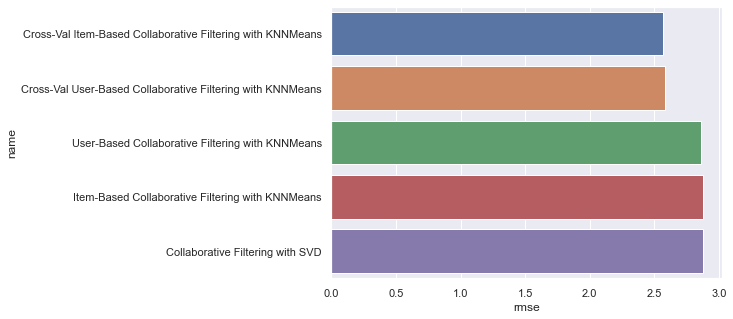

In [111]:
sns.set()
plt.figure(figsize=(7,5))
sns.barplot(x = "rmse", y = "name", data = model_results)
plt.show()

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">The best models seem to be Item-based and User-Based Collaborative filtering with KNNMeans fit with cross validation</span></h4>
</blockquote>

<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">8. Try and recommend top 5 products for test users</span></h3>

In [182]:
# Top 5 recommendations for a sample test user
pred = pd.DataFrame(test_pred)
for uid in pred['uid'].sample():
    print(uid)
    print(pred[pred['uid'] == 'Simon'][['iid', 'r_ui','est']].sort_values(by = 'est', ascending = False).head(5))
    print()

Cliente Amazon
                           iid  r_ui       est
13836  samsung-galaxy-note-iii  10.0  9.684642
10212         samsung-gt-e1200   8.0  9.680418
42707         acer-cloudmobile  10.0  9.582443
11776    motorola-photon-q-lte  10.0  9.547781
35579          motorola-moto-g  10.0  9.358828



<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">9. Check for outliers and impute them as required</span></h3>

<AxesSubplot:xlabel='score'>

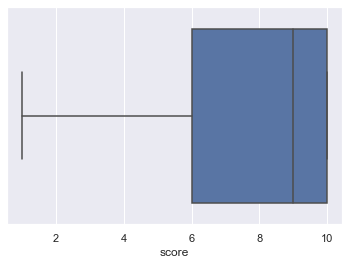

In [185]:
sns.boxplot(train_df.score)

In [186]:
q1 = train_df['score'].quantile(0.25) #first quartile value
q3 = train_df['score'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low, high, iqr

(0.0, 16.0, 4.0)

In [187]:
# imputation by capping technique | replace outliers with whiskers
train_df.loc[train_df["score"] < low, "score"] = low
train_df.loc[train_df["score"] > high, "score"] = high

<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">11. In what business scenario you should use popularity based Recommendation Systems ?</span></h3>

<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">• Recommend products rated high by all users.<br>
• It works without having information on the user.<br>
• It's not personalized for specific users, It uses a simple frequency based recommendations.<br>
• A common approach is to use collaborative filtering whenver we have enough data to avoid cold-start and grey-sheep problems and fall-back to a simple popularity based recommendation system whenever such a problem is there or when we have no data on the current user.<br></span></h4>
</blockquote>


<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">12. In what business scenario you should use CF based Recommendation Systems ?</span></h3>


<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">• Recommend products rated high by users similar to current users (user-based) or items rated similar to current item (item-based)<br>
• It doesn't require any information about the users or the content of the review ..etc., Only the ratings given by other users for the items is sufficient<br>
• Might show you unrelated products if you do it a high-level all-products at once.<br>
• Suffers from cold-start and grey-sheep problem
• Cold-start: New products or new users with no ratings or history columns or rows → Use a hybrid approach with fall-back to content-based reccomendation system<br>
• Grey-sheep problem: One or two ratings for a few products, but none else in the crowd, rated them highly. No neighbours to find -> Switch to popularity based or content-based for the specific user...<br>
• Content-based models can be used to solve the Cold Start and Gray Sheep problems in Collaborative Filtering<br>
• Have to do it a category-level, sub-category level granularity<br>
• de-mean the item rating data to remove item bias<br>
• Generally both user-based and item-based are used to give recommendations<br>
• A common approach is to use collaborative filtering whenver we have enough data to avoid cold-start and grey-sheep problems and use content-based recommendation when we don't have data on user but have enough information on the product (description, reviews...) and fall-back to a simple popularity based recommendation system whenever such a problem is there or when we have no data on the current user.<br></span></h4>
</blockquote>


<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">13. What other possible methods can you think of which can further improve the recommendation for different users</span></h3>


<blockquote>
    <h4><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">• Deep Learning based models: LSTMS, BiLSTMS (with Bidirection Context), Transformers, BERT .. will be much more effective to learn about sentiment from the reviews using various word embeddings. Several libraries like flair, HuggingFace, keras could be used to build review rating classfifiers.<br>
• Preprocessing of reviews will help the content based models learn a lot better by stripping stop words, removing puncutation, extracting keywords ... etc.,<br>
• Using a Hybrid model with various techniques will almost always yield better results.<br>
• A common approach is to use Latent Factor models for high-level recommendation and then improving them using content-based systems by using the information on users or item    
<br></span></h4>
</blockquote>